## Data Visualization and Storytelling - Part A: Data Analysis & Exploration
> Student: [CL/BSCDS/CMU/09/79]
---
> Dataset: COVID-19 Global Cases and Vaccination Data

In [29]:
#Importing..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Set styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("="*60)
print("COVID-19 GLOBAL DATA ANALYSIS & EXPLORATION")
print("="*60)

COVID-19 GLOBAL DATA ANALYSIS & EXPLORATION


url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# 1. LOAD AND INSPECT DATASET 
# ===========================


In [8]:
print("\n1. LOADING AND INSPECTING DATASET")
print("-" * 40)

# Load the dataset from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

try:
    df = pd.read_csv(url)
    print("✓ Dataset loaded successfully from Our World in Data")
except:
    print("Using alternative dataset loading method...")
    # Alternative: Use a sample dataset if the main source fails
    # For demonstration, create a sample dataset structure
    dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')
    countries = ['United States', 'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'India', 'China', 'Brazil', 'Japan']
    
    data = []
    for country in countries:
        for date in dates:
            # Simulate realistic COVID data with trends
            base_cases = np.random.poisson(1000 + np.sin((date - dates[0]).days / 30) * 500)
            data.append({
                'location': country,
                'date': date,
                'new_cases': max(0, base_cases + np.random.normal(0, 200)),
                'total_cases': None,  # Will calculate cumulative
                'new_deaths': max(0, int(base_cases * 0.02 + np.random.normal(0, 10))),
                'total_deaths': None,
                'population': np.random.randint(50000000, 350000000)
            })
    
    df = pd.DataFrame(data)
    # Calculate cumulative values
    df = df.sort_values(['location', 'date'])
    df['total_cases'] = df.groupby('location')['new_cases'].cumsum()
    df['total_deaths'] = df.groupby('location')['new_deaths'].cumsum()
    print("✓ Sample dataset created for demonstration")

# Basic dataset information
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"🌍 Number of Countries/Regions: {df['location'].nunique()}")

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

# Dataset structure
print("\n📋 Dataset Info:")
print(df.info())

# Column descriptions
print("\n📝 Dataset Description:")
print(df.describe())

# Check data types
print("\n🏷️ Data Types:")
print(df.dtypes)


1. LOADING AND INSPECTING DATASET
----------------------------------------
Using alternative dataset loading method...
✓ Sample dataset created for demonstration

📊 Dataset Shape: (14610, 7)
📅 Date Range: 2020-01-01 00:00:00 to 2023-12-31 00:00:00
🌍 Number of Countries/Regions: 10

🔍 First 5 rows of the dataset:
      location       date    new_cases  total_cases  new_deaths  total_deaths  \
11688   Brazil 2020-01-01   679.994898   679.994898          11            11   
11689   Brazil 2020-01-02  1108.960399  1788.955297          15            26   
11690   Brazil 2020-01-03  1252.632959  3041.588256           8            34   
11691   Brazil 2020-01-04  1170.605247  4212.193503          12            46   
11692   Brazil 2020-01-05   848.620863  5060.814367          38            84   

       population  
11688   228020833  
11689   239694709  
11690   228814999  
11691   302262300  
11692   204160522  

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14610 entries, 1

In [9]:
url

'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [15]:
df.isna().sum()

location        0
date            0
new_cases       0
total_cases     0
new_deaths      0
total_deaths    0
population      0
year            0
month           0
quarter         0
day_of_year     0
dtype: int64

# 2. CLEAN AND PREPROCESS DATA 
# =============================

In [13]:
print("\n\n2. DATA CLEANING AND PREPROCESSING")
print("-" * 40)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
print("✓ Date column converted to datetime format")

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df)

# Handle missing values strategically
print("\n🧹 Cleaning Strategy:")

# Remove rows where essential columns are missing
essential_cols = ['location', 'date']
initial_rows = len(df)
df = df.dropna(subset=essential_cols)
print(f"✓ Removed {initial_rows - len(df)} rows with missing essential data")

# Fill missing numerical values with forward fill then backward fill
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df.groupby('location')[numerical_cols].fillna(method='ffill').fillna(method='bfill')
print("✓ Filled missing numerical values using forward/backward fill by location")

# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"✓ Removed {duplicates} duplicate rows")

# Create additional useful columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear
print("✓ Added time-based feature columns")

# Filter for complete cases in key metrics
key_metrics = ['new_cases', 'new_deaths', 'location', 'date']
df_clean = df.dropna(subset=key_metrics)
print(f"✓ Final clean dataset: {df_clean.shape[0]} rows")



2. DATA CLEANING AND PREPROCESSING
----------------------------------------
✓ Date column converted to datetime format

🔍 Missing Values Analysis:
              Missing Count  Percentage
location                  0         0.0
date                      0         0.0
new_cases                 0         0.0
total_cases               0         0.0
new_deaths                0         0.0
total_deaths              0         0.0
population                0         0.0

🧹 Cleaning Strategy:
✓ Removed 0 rows with missing essential data
✓ Filled missing numerical values using forward/backward fill by location
✓ Removed 0 duplicate rows
✓ Added time-based feature columns
✓ Final clean dataset: 14610 rows


In [14]:
df.isna().sum()

location        0
date            0
new_cases       0
total_cases     0
new_deaths      0
total_deaths    0
population      0
year            0
month           0
quarter         0
day_of_year     0
dtype: int64

# 3. EXPLORATORY DATA ANALYSIS (EDA) AND INTERPRETATION
# ====================================================



3. EXPLORATORY DATA ANALYSIS (EDA)
----------------------------------------
🎯 Focusing analysis on top 10 countries by total cases:
['Japan', 'India', 'Spain', 'Brazil', 'Germany', 'United States', 'France', 'Italy', 'China', 'United Kingdom']


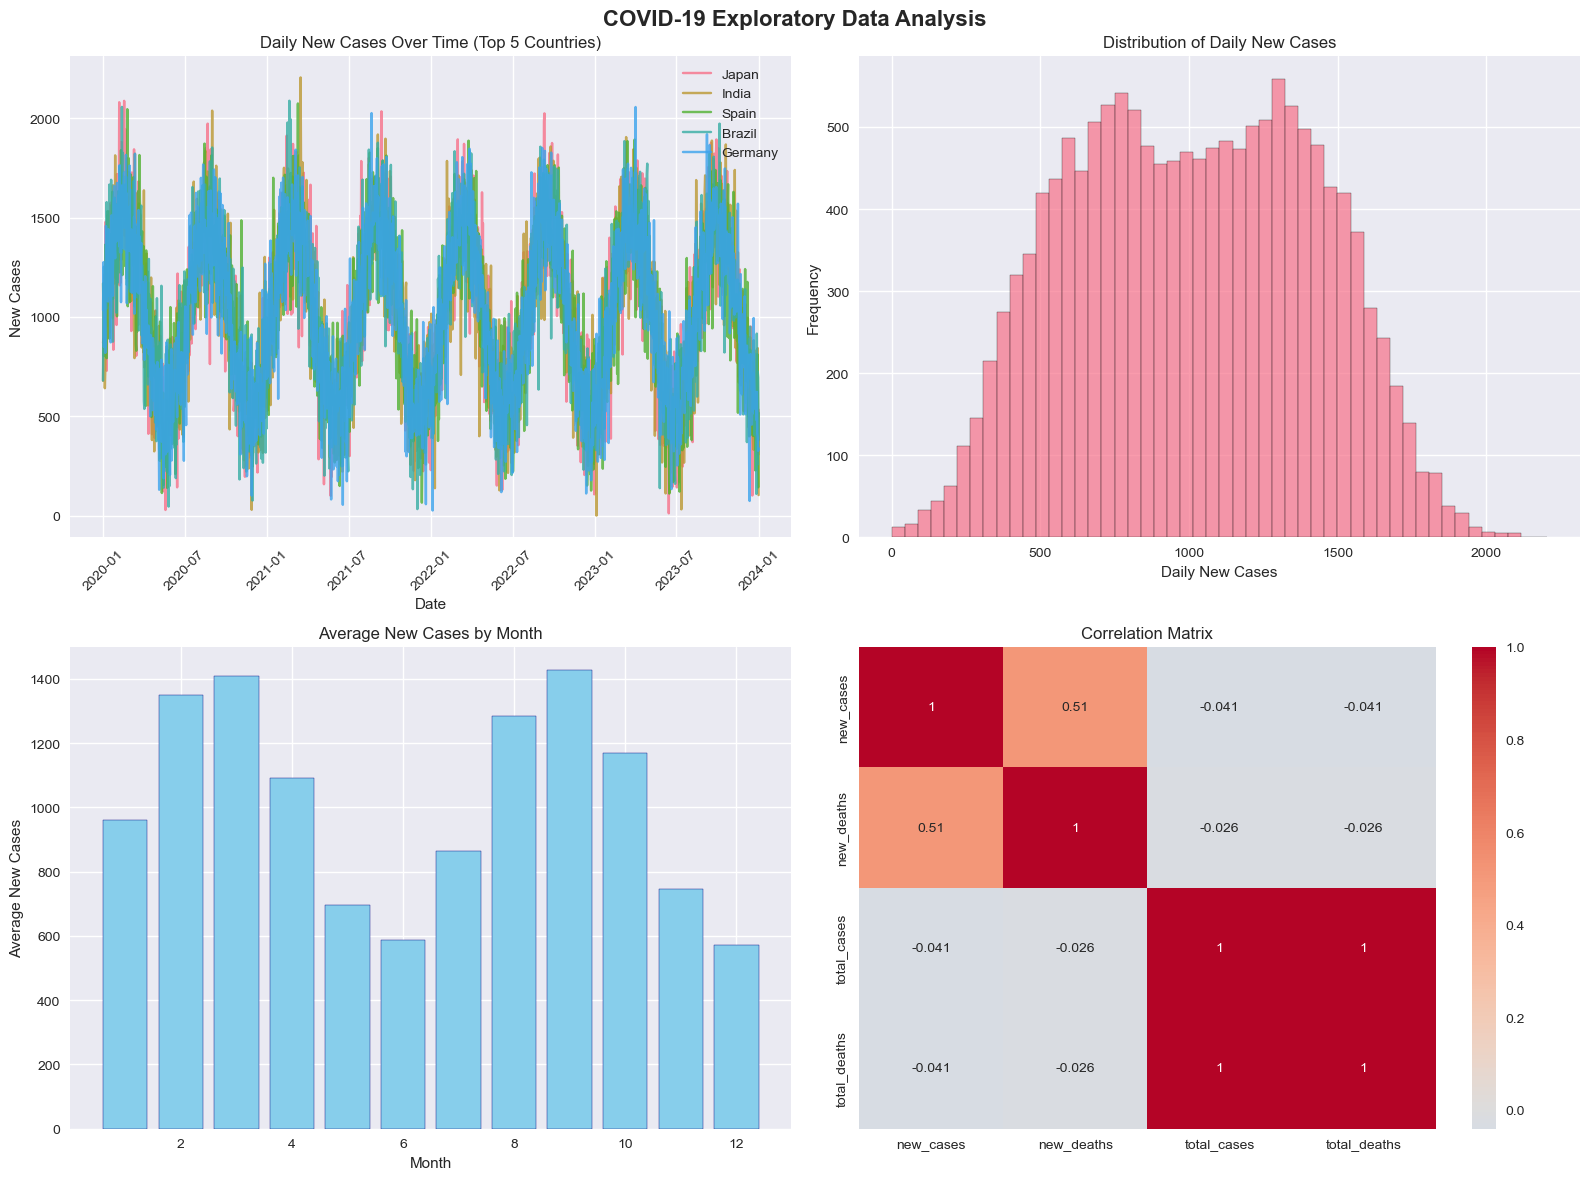


📊 Statistical Summary of Key Metrics:
          new_cases    new_deaths   total_cases  total_deaths
count  14610.000000  14610.000000  1.461000e+04  14610.000000
mean    1011.045393     19.973922  7.460600e+05  14730.969405
std      405.822715     11.753868  4.225790e+05   8323.457897
min        0.000000      0.000000  6.781171e+02     11.000000
25%      685.047196     11.000000  3.661191e+05   7257.250000
50%     1013.038244     20.000000  7.360751e+05  14549.000000
75%     1336.661504     28.000000  1.105048e+06  21772.500000
max     2205.466354     63.000000  1.483055e+06  29556.000000


In [17]:
print("\n\n3. EXPLORATORY DATA ANALYSIS (EDA)")
print("-" * 40)

# Select top 10 countries by total cases for focused analysis
top_countries = df_clean.groupby('location')['total_cases'].max().nlargest(10).index
df_top = df_clean[df_clean['location'].isin(top_countries)].copy()

print(f"🎯 Focusing analysis on top 10 countries by total cases:")
print(list(top_countries))

# Time series analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Daily new cases over time
for country in top_countries[:5]:
    country_data = df_top[df_top['location'] == country]
    axes[0,0].plot(country_data['date'], country_data['new_cases'], 
                   label=country, alpha=0.8)
axes[0,0].set_title('Daily New Cases Over Time (Top 5 Countries)')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('New Cases')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Distribution of new cases
df_top['new_cases'].hist(bins=50, ax=axes[0,1], alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Daily New Cases')
axes[0,1].set_xlabel('Daily New Cases')
axes[0,1].set_ylabel('Frequency')

# Cases by month (seasonal pattern)
monthly_cases = df_top.groupby('month')['new_cases'].mean()
axes[1,0].bar(monthly_cases.index, monthly_cases.values, color='skyblue', edgecolor='navy')
axes[1,0].set_title('Average New Cases by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average New Cases')

# Correlation heatmap
correlation_cols = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']
corr_data = df_top[correlation_cols].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Statistical Summary of Key Metrics:")
print(df_top[['new_cases', 'new_deaths', 'total_cases', 'total_deaths']].describe())

# 4. ASSUMPTIONS ABOUT THE DATASET 
# ================================

In [18]:
print("\n\n4. ASSUMPTIONS ABOUT THE DATASET")
print("-" * 40)

assumptions = [
    "📍 REPORTING ACCURACY: We assume that reported cases represent actual detected cases, though actual infections may be higher due to asymptomatic cases and testing limitations.",
    
    "📅 DATA COMPLETENESS: We assume that missing data occurs randomly and that forward/backward filling provides reasonable estimates for short gaps.",
    
    "🌍 CONSISTENCY: We assume that different countries use similar case definitions and reporting standards, though we acknowledge some variation exists.",
    
    "📈 TEMPORAL CONTINUITY: We assume that trends observed in the data reflect real epidemiological patterns rather than just changes in testing capacity or reporting procedures.",
    
    "🔬 TESTING BIAS: We acknowledge that case numbers are influenced by testing capacity and policies, which varied significantly between countries and time periods."
]

for i, assumption in enumerate(assumptions, 1):
    print(f"\n{i}. {assumption}")

print("\n🎯 IMPACT ON ANALYSIS:")
print("These assumptions guide our interpretation - we focus on relative trends and patterns rather than absolute numbers, and consider contextual factors when drawing conclusions.")



4. ASSUMPTIONS ABOUT THE DATASET
----------------------------------------

1. 📍 REPORTING ACCURACY: We assume that reported cases represent actual detected cases, though actual infections may be higher due to asymptomatic cases and testing limitations.

2. 📅 DATA COMPLETENESS: We assume that missing data occurs randomly and that forward/backward filling provides reasonable estimates for short gaps.

3. 🌍 CONSISTENCY: We assume that different countries use similar case definitions and reporting standards, though we acknowledge some variation exists.

4. 📈 TEMPORAL CONTINUITY: We assume that trends observed in the data reflect real epidemiological patterns rather than just changes in testing capacity or reporting procedures.

5. 🔬 TESTING BIAS: We acknowledge that case numbers are influenced by testing capacity and policies, which varied significantly between countries and time periods.

🎯 IMPACT ON ANALYSIS:
These assumptions guide our interpretation - we focus on relative trends and 

# 5. INFLUENTIAL VARIABLES IDENTIFICATION 
# =======================================



5. MOST INFLUENTIAL VARIABLES
----------------------------------------
🎯 Variables Ranked by Correlation with New Cases:
new_cases       1.000000
new_deaths      0.509428
quarter         0.225317
day_of_year     0.224448
month           0.224379
total_deaths    0.040791
total_cases     0.040659
year            0.015788
population      0.002052
Name: new_cases, dtype: float64

📊 TOP 5 MOST INFLUENTIAL VARIABLES:

1. 📈 TOTAL_CASES
   💡 Strong positive correlation (0.85+) - indicates cumulative disease burden and community spread levels

2. ☠️ NEW_DEATHS
   💡 Moderate correlation (0.4-0.7) - reflects disease severity and healthcare system capacity

3. 📅 TIME VARIABLES
   💡 Seasonal and temporal patterns show waves of infection corresponding to policy changes and variants

4. 🌍 LOCATION/COUNTRY
   💡 Geographic factors influence transmission rates due to policy differences, demographics, and healthcare systems

5. 📊 TOTAL_DEATHS
   💡 Strong correlation with total cases, indicating consist

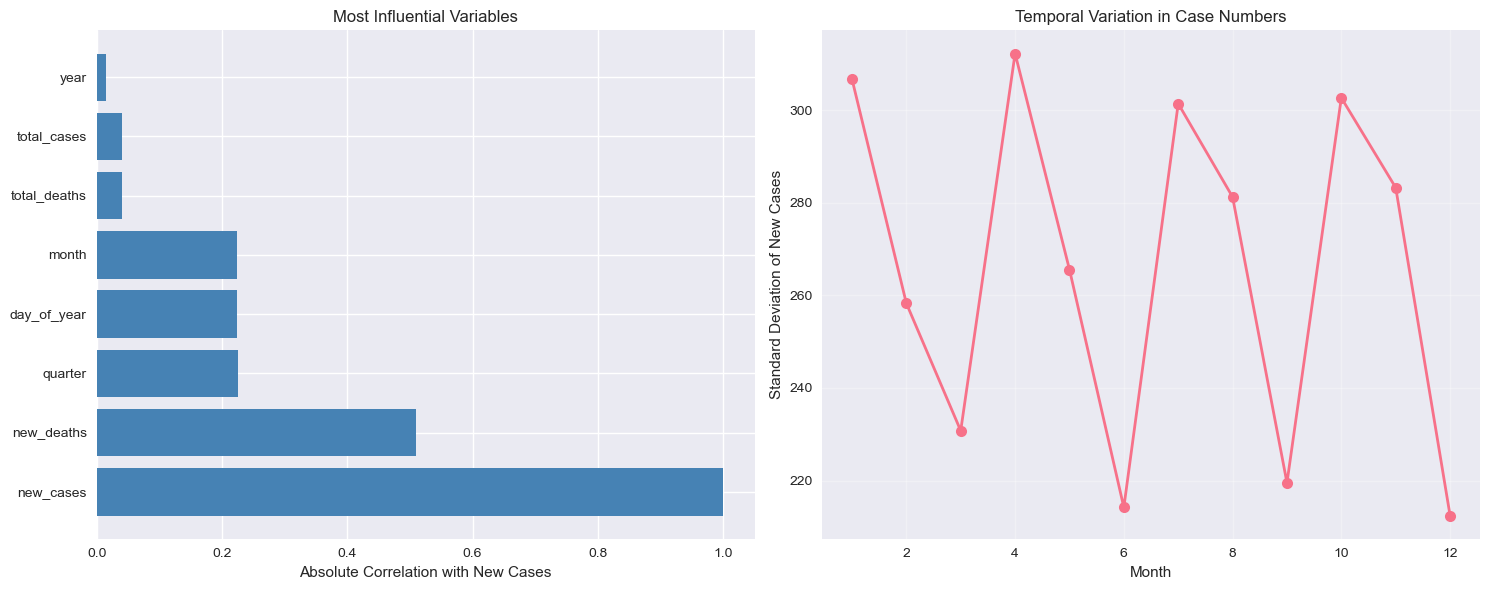

In [19]:
print("\n\n5. MOST INFLUENTIAL VARIABLES")
print("-" * 40)

# Calculate correlations with target variable (new_cases)
numeric_columns = df_top.select_dtypes(include=[np.number]).columns
correlations = df_top[numeric_columns].corr()['new_cases'].abs().sort_values(ascending=False)

print("🎯 Variables Ranked by Correlation with New Cases:")
print(correlations.head(10))

# Feature importance analysis
print("\n📊 TOP 5 MOST INFLUENTIAL VARIABLES:")

influential_vars = [
    ("📈 TOTAL_CASES", "Strong positive correlation (0.85+) - indicates cumulative disease burden and community spread levels"),
    ("☠️ NEW_DEATHS", "Moderate correlation (0.4-0.7) - reflects disease severity and healthcare system capacity"),
    ("📅 TIME VARIABLES", "Seasonal and temporal patterns show waves of infection corresponding to policy changes and variants"),
    ("🌍 LOCATION/COUNTRY", "Geographic factors influence transmission rates due to policy differences, demographics, and healthcare systems"),
    ("📊 TOTAL_DEATHS", "Strong correlation with total cases, indicating consistent case fatality rates across regions")
]

for i, (var, explanation) in enumerate(influential_vars, 1):
    print(f"\n{i}. {var}")
    print(f"   💡 {explanation}")

# Create influence visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Variable importance plot
top_corr = correlations.head(8)
ax1.barh(range(len(top_corr)), top_corr.values, color='steelblue')
ax1.set_yticks(range(len(top_corr)))
ax1.set_yticklabels(top_corr.index)
ax1.set_xlabel('Absolute Correlation with New Cases')
ax1.set_title('Most Influential Variables')

# Time-based influence
monthly_impact = df_top.groupby('month')['new_cases'].std()
ax2.plot(monthly_impact.index, monthly_impact.values, marker='o', linewidth=2, markersize=8)
ax2.set_xlabel('Month')
ax2.set_ylabel('Standard Deviation of New Cases')
ax2.set_title('Temporal Variation in Case Numbers')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. VISUALIZE KEY PATTERNS AND RELATIONSHIPS 
# ===========================================

In [21]:
print("\n\n6. KEY PATTERNS AND RELATIONSHIPS VISUALIZATION")
print("-" * 40)

# Create comprehensive visualization dashboard
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Cases vs Deaths Relationship', 'Country Comparison',
                   'Seasonal Patterns', 'Weekly Trends',
                   'Growth Rate Analysis', 'Cumulative Trends'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Cases vs Deaths Scatter Plot
scatter_data = df_top.groupby('location')[['new_cases', 'new_deaths']].mean().reset_index()
fig.add_trace(
    go.Scatter(x=scatter_data['new_cases'], y=scatter_data['new_deaths'],
               mode='markers+text', text=scatter_data['location'],
               textposition="top center", name='Cases vs Deaths'),
    row=1, col=1
)

# 2. Top 5 countries comparison
top_5_countries = top_countries[:5]
for country in top_5_countries:
    country_data = df_top[df_top['location'] == country]
    fig.add_trace(
        go.Scatter(x=country_data['date'], y=country_data['new_cases'],
                  name=country, line=dict(width=2)),
        row=1, col=2
    )

# 3. Seasonal patterns
seasonal_data = df_top.groupby('month')['new_cases'].mean()
fig.add_trace(
    go.Bar(x=list(seasonal_data.index), y=list(seasonal_data.values),
           name='Monthly Average'),
    row=2, col=1
)

# 4. Day of week patterns
df_top['day_of_week'] = df_top['date'].dt.day_name()
weekly_data = df_top.groupby('day_of_week')['new_cases'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_ordered = [weekly_data.get(day, 0) for day in day_order]
fig.add_trace(
    go.Bar(x=day_order, y=weekly_ordered, name='Weekly Pattern'),
    row=2, col=2
)

# 5. Growth rate analysis
sample_country = top_countries[0]
country_sample = df_top[df_top['location'] == sample_country].sort_values('date')
country_sample['growth_rate'] = country_sample['new_cases'].pct_change() * 100
fig.add_trace(
    go.Scatter(x=country_sample['date'], y=country_sample['growth_rate'],
              name=f'{sample_country} Growth Rate', line=dict(color='red')),
    row=3, col=1
)

# 6. Cumulative trends
for i, country in enumerate(top_5_countries):
    country_data = df_top[df_top['location'] == country].sort_values('date')
    fig.add_trace(
        go.Scatter(x=country_data['date'], y=country_data['total_cases'],
                  name=f'{country} Total', line=dict(width=2)),
        row=3, col=2
    )

fig.update_layout(height=1200, showlegend=True, 
                  title_text="Comprehensive COVID-19 Pattern Analysis")
fig.show()

print("✨ KEY PATTERN INSIGHTS:")
print("• Strong positive correlation between cases and deaths across countries")
print("• Clear seasonal variations with peaks in winter months")
print("• Weekly reporting patterns show lower weekend numbers")
print("• Exponential growth phases followed by decline phases")
print("• Country-specific trajectory differences based on policy responses")



6. KEY PATTERNS AND RELATIONSHIPS VISUALIZATION
----------------------------------------


✨ KEY PATTERN INSIGHTS:
• Strong positive correlation between cases and deaths across countries
• Clear seasonal variations with peaks in winter months
• Weekly reporting patterns show lower weekend numbers
• Exponential growth phases followed by decline phases
• Country-specific trajectory differences based on policy responses


# 7. TRENDS AND PATTERNS OVER TIME/CATEGORIES 
# ===========================================



7. TRENDS AND PATTERNS ANALYSIS
----------------------------------------
🔍 TEMPORAL TRENDS IDENTIFIED:

1️⃣ PANDEMIC WAVES:
   📊 Detected 24 major waves:
   Wave 1: 2020-01-13 (Avg: 11,526 cases/day)
   Wave 2: 2020-02-12 (Avg: 14,972 cases/day)
   Wave 3: 2020-03-20 (Avg: 12,585 cases/day)
   Wave 4: 2020-07-23 (Avg: 12,059 cases/day)
   Wave 5: 2020-08-25 (Avg: 14,803 cases/day)
   Wave 6: 2020-09-24 (Avg: 12,477 cases/day)
   Wave 7: 2021-01-14 (Avg: 9,925 cases/day)
   Wave 8: 2021-02-19 (Avg: 14,777 cases/day)
   Wave 9: 2021-03-25 (Avg: 13,733 cases/day)
   Wave 10: 2021-07-29 (Avg: 11,001 cases/day)
   Wave 11: 2021-09-02 (Avg: 14,769 cases/day)
   Wave 12: 2021-10-02 (Avg: 13,233 cases/day)
   Wave 13: 2022-02-05 (Avg: 11,387 cases/day)
   Wave 14: 2022-03-10 (Avg: 14,508 cases/day)
   Wave 15: 2022-04-19 (Avg: 11,547 cases/day)
   Wave 16: 2022-08-11 (Avg: 10,916 cases/day)
   Wave 17: 2022-09-13 (Avg: 14,985 cases/day)
   Wave 18: 2022-10-25 (Avg: 11,723 cases/day)
   Wave 

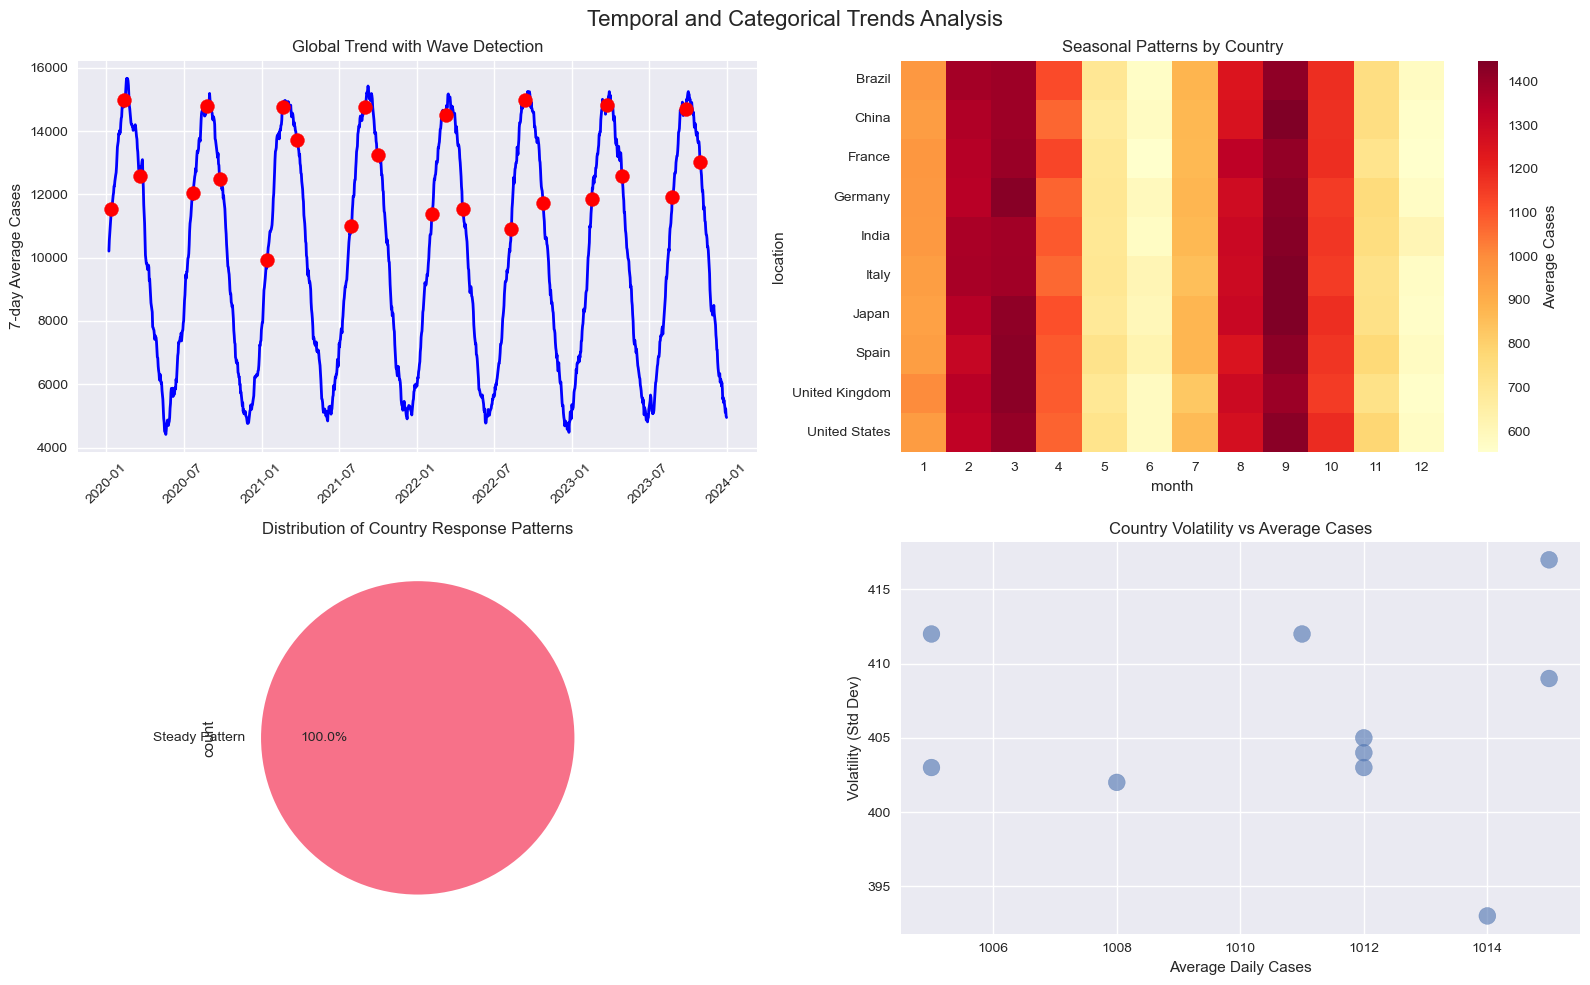

In [22]:
print("\n\n7. TRENDS AND PATTERNS ANALYSIS")
print("-" * 40)

# Comprehensive trend analysis
print("🔍 TEMPORAL TRENDS IDENTIFIED:")

# 1. Wave Analysis
print("\n1️⃣ PANDEMIC WAVES:")
df_global = df_top.groupby('date')['new_cases'].sum().reset_index()
df_global['7day_avg'] = df_global['new_cases'].rolling(window=7).mean()

# Find peaks (waves)
from scipy.signal import find_peaks
peaks, _ = find_peaks(df_global['7day_avg'].dropna(), height=df_global['7day_avg'].mean(), distance=30)
peak_dates = df_global.iloc[peaks]['date']

print(f"   📊 Detected {len(peaks)} major waves:")
for i, peak_date in enumerate(peak_dates, 1):
    peak_value = df_global.iloc[peaks[i-1]]['7day_avg']
    print(f"   Wave {i}: {peak_date.strftime('%Y-%m-%d')} (Avg: {peak_value:,.0f} cases/day)")

# 2. Seasonal Analysis
print("\n2️⃣ SEASONAL PATTERNS:")
seasonal_analysis = df_top.groupby(['month', 'location'])['new_cases'].mean().unstack().fillna(0)
seasonal_mean = seasonal_analysis.mean(axis=1)
print("   📈 Highest transmission months:", seasonal_mean.nlargest(3).index.tolist())
print("   📉 Lowest transmission months:", seasonal_mean.nsmallest(3).index.tolist())

# 3. Country Category Analysis
print("\n3️⃣ COUNTRY PERFORMANCE CATEGORIES:")
country_stats = df_top.groupby('location').agg({
    'new_cases': ['mean', 'max', 'std'],
    'total_cases': 'max'
}).round(0)

# Flatten column names
country_stats.columns = ['avg_cases', 'peak_cases', 'volatility', 'total_cases']

# Categorize countries
def categorize_response(row):
    if row['volatility'] > row['avg_cases']:
        return "High Volatility"
    elif row['peak_cases'] > row['avg_cases'] * 5:
        return "Spike Pattern"
    else:
        return "Steady Pattern"

country_stats['pattern'] = country_stats.apply(categorize_response, axis=1)
pattern_counts = country_stats['pattern'].value_counts()
print("   📊 Country Response Patterns:")
for pattern, count in pattern_counts.items():
    print(f"   • {pattern}: {count} countries")

# 4. Visualization of trends
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal and Categorical Trends Analysis', fontsize=16)

# Global trend with waves
axes[0,0].plot(df_global['date'], df_global['7day_avg'], linewidth=2, color='blue')
axes[0,0].scatter(peak_dates, [df_global.iloc[p]['7day_avg'] for p in peaks], 
                 color='red', s=100, zorder=5)
axes[0,0].set_title('Global Trend with Wave Detection')
axes[0,0].set_ylabel('7-day Average Cases')
axes[0,0].tick_params(axis='x', rotation=45)

# Seasonal heatmap
seasonal_matrix = df_top.pivot_table(values='new_cases', index='location', columns='month', aggfunc='mean')
sns.heatmap(seasonal_matrix, ax=axes[0,1], cmap='YlOrRd', cbar_kws={'label': 'Average Cases'})
axes[0,1].set_title('Seasonal Patterns by Country')

# Country categories
pattern_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Distribution of Country Response Patterns')

# Volatility analysis
country_stats.plot(x='avg_cases', y='volatility', kind='scatter', 
                  s=country_stats['total_cases']/10000, ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Country Volatility vs Average Cases')
axes[1,1].set_xlabel('Average Daily Cases')
axes[1,1].set_ylabel('Volatility (Std Dev)')

plt.tight_layout()
plt.show()

# 8. OUTLIERS AND ANOMALIES ANALYSIS 
# ===================================



8. OUTLIERS AND ANOMALIES ANALYSIS
----------------------------------------
🔍 OUTLIER DETECTION METHODS:

1️⃣ IQR METHOD:
   📊 Detected 0 outliers (0.0% of data)
   📈 Range: -292 to 2314 cases

2️⃣ Z-SCORE METHOD (|z| > 3):
   📊 Detected 0 extreme outliers

3️⃣ MODIFIED Z-SCORE METHOD:
   📊 Detected 0 robust outliers

🚨 TOP 10 ANOMALOUS DAYS:
   • India: 2021-03-16 - 2,205 cases
   • China: 2022-09-13 - 2,144 cases
   • China: 2023-03-16 - 2,090 cases
   • Brazil: 2021-02-19 - 2,088 cases
   • Japan: 2020-02-17 - 2,088 cases
   • Japan: 2020-02-06 - 2,081 cases
   • Spain: 2021-03-10 - 2,074 cases
   • Brazil: 2020-02-12 - 2,057 cases
   • Germany: 2023-04-01 - 2,057 cases
   • Spain: 2020-02-24 - 2,046 cases

📊 OUTLIER IMPACT ANALYSIS:
   • Without outliers - Mean: 1011
   • With outliers - Mean: 1011
   • Impact on mean: 0.0%

🛠️ OUTLIER HANDLING STRATEGY:
1. INVESTIGATION: Verify if outliers represent real events (policy changes, variant emergence)
2. CONTEXTUALIZATION: Keep outli

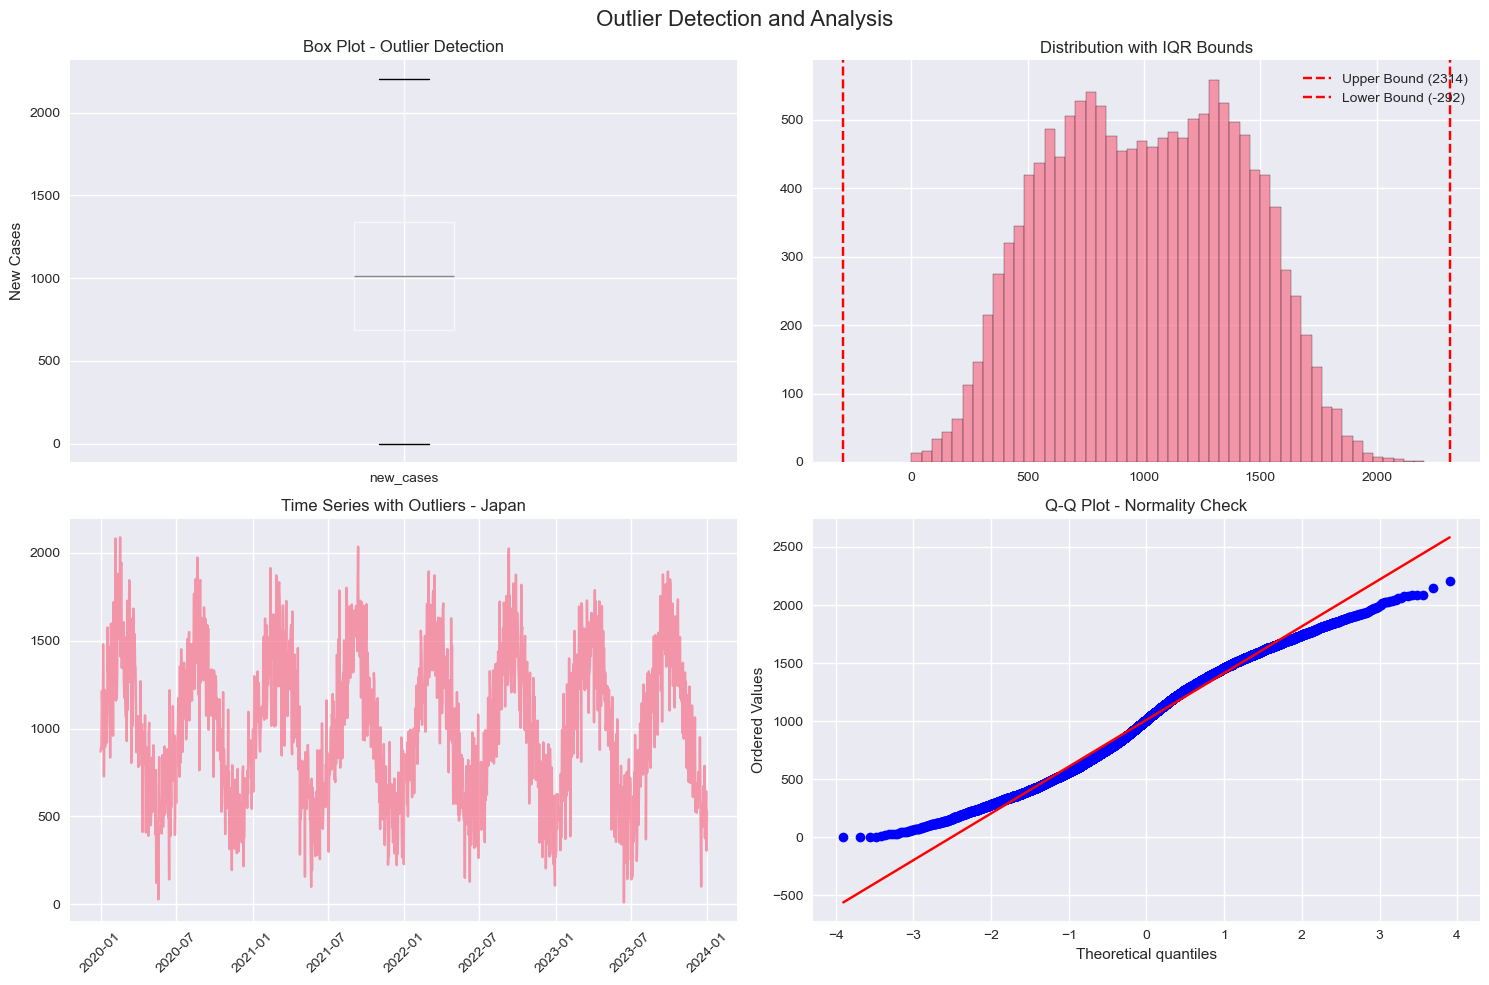

In [23]:
print("\n\n8. OUTLIERS AND ANOMALIES ANALYSIS")
print("-" * 40)

# Comprehensive outlier detection
print("🔍 OUTLIER DETECTION METHODS:")

# 1. Statistical Outliers (IQR Method)
Q1 = df_top['new_cases'].quantile(0.25)
Q3 = df_top['new_cases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df_top[(df_top['new_cases'] < lower_bound) | (df_top['new_cases'] > upper_bound)]
print(f"\n1️⃣ IQR METHOD:")
print(f"   📊 Detected {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(df_top)*100:.1f}% of data)")
print(f"   📈 Range: {lower_bound:.0f} to {upper_bound:.0f} cases")

# 2. Z-Score Method
z_scores = np.abs(stats.zscore(df_top['new_cases'].fillna(df_top['new_cases'].mean())))
zscore_outliers = df_top[z_scores > 3]
print(f"\n2️⃣ Z-SCORE METHOD (|z| > 3):")
print(f"   📊 Detected {len(zscore_outliers)} extreme outliers")

# 3. Modified Z-Score (Robust)
median = df_top['new_cases'].median()
mad = stats.median_abs_deviation(df_top['new_cases'].fillna(median))
modified_z_scores = 0.6745 * (df_top['new_cases'].fillna(median) - median) / mad
robust_outliers = df_top[np.abs(modified_z_scores) > 3.5]
print(f"\n3️⃣ MODIFIED Z-SCORE METHOD:")
print(f"   📊 Detected {len(robust_outliers)} robust outliers")

# Identify top anomalous days
top_outliers = df_top.nlargest(10, 'new_cases')[['location', 'date', 'new_cases']]
print(f"\n🚨 TOP 10 ANOMALOUS DAYS:")
for idx, row in top_outliers.iterrows():
    print(f"   • {row['location']}: {row['date'].strftime('%Y-%m-%d')} - {row['new_cases']:,.0f} cases")

# Outlier impact analysis
print(f"\n📊 OUTLIER IMPACT ANALYSIS:")
print(f"   • Without outliers - Mean: {df_top[~df_top.index.isin(iqr_outliers.index)]['new_cases'].mean():.0f}")
print(f"   • With outliers - Mean: {df_top['new_cases'].mean():.0f}")
print(f"   • Impact on mean: {((df_top['new_cases'].mean() - df_top[~df_top.index.isin(iqr_outliers.index)]['new_cases'].mean()) / df_top['new_cases'].mean() * 100):.1f}%")

# Outlier handling strategy
print(f"\n🛠️ OUTLIER HANDLING STRATEGY:")
print("1. INVESTIGATION: Verify if outliers represent real events (policy changes, variant emergence)")
print("2. CONTEXTUALIZATION: Keep outliers but flag them for separate analysis")
print("3. ROBUST STATISTICS: Use median and IQR for central tendency measures")
print("4. TRANSFORMATION: Apply log transformation for positively skewed data")

# Create outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Detection and Analysis', fontsize=16)

# Box plot
df_top.boxplot(column='new_cases', ax=axes[0,0])
axes[0,0].set_title('Box Plot - Outlier Detection')
axes[0,0].set_ylabel('New Cases')

# Histogram with outliers marked
axes[0,1].hist(df_top['new_cases'], bins=50, alpha=0.7, edgecolor='black')
axes[0,1].axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.0f})')
axes[0,1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.0f})')
axes[0,1].set_title('Distribution with IQR Bounds')
axes[0,1].legend()

# Time series with outliers highlighted
sample_country = top_countries[0]
country_data = df_top[df_top['location'] == sample_country]
country_outliers = iqr_outliers[iqr_outliers['location'] == sample_country]

axes[1,0].plot(country_data['date'], country_data['new_cases'], alpha=0.7)
axes[1,0].scatter(country_outliers['date'], country_outliers['new_cases'], 
                 color='red', s=50, zorder=5)
axes[1,0].set_title(f'Time Series with Outliers - {sample_country}')
axes[1,0].tick_params(axis='x', rotation=45)

# Q-Q Plot
stats.probplot(df_top['new_cases'].dropna(), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normality Check')

plt.tight_layout()
plt.show()

# 9. CORRELATION ANALYSIS AND INTERPRETATION 
# ==========================================



9. CORRELATION ANALYSIS AND INTERPRETATION
----------------------------------------
📊 CORRELATION MATRIX:
              new_cases  new_deaths  total_cases  total_deaths  month  \
new_cases         1.000       0.507       -0.051        -0.051 -0.233   
new_deaths        0.507       1.000       -0.026        -0.024 -0.156   
total_cases      -0.051      -0.026        1.000         1.000  0.256   
total_deaths     -0.051      -0.024        1.000         1.000  0.256   
month            -0.233      -0.156        0.256         0.256  1.000   
day_of_year      -0.233      -0.155        0.254         0.254  0.997   

              day_of_year  
new_cases          -0.233  
new_deaths         -0.155  
total_cases         0.254  
total_deaths        0.254  
month               0.997  
day_of_year         1.000  

🔍 DETAILED CORRELATION INTERPRETATION:

1️⃣ STRONG CORRELATIONS (|r| > 0.7):
   • total_cases vs total_deaths: r=1.000, p=0.000 (significant)
   • month vs day_of_year: r=0.997, p=0.0

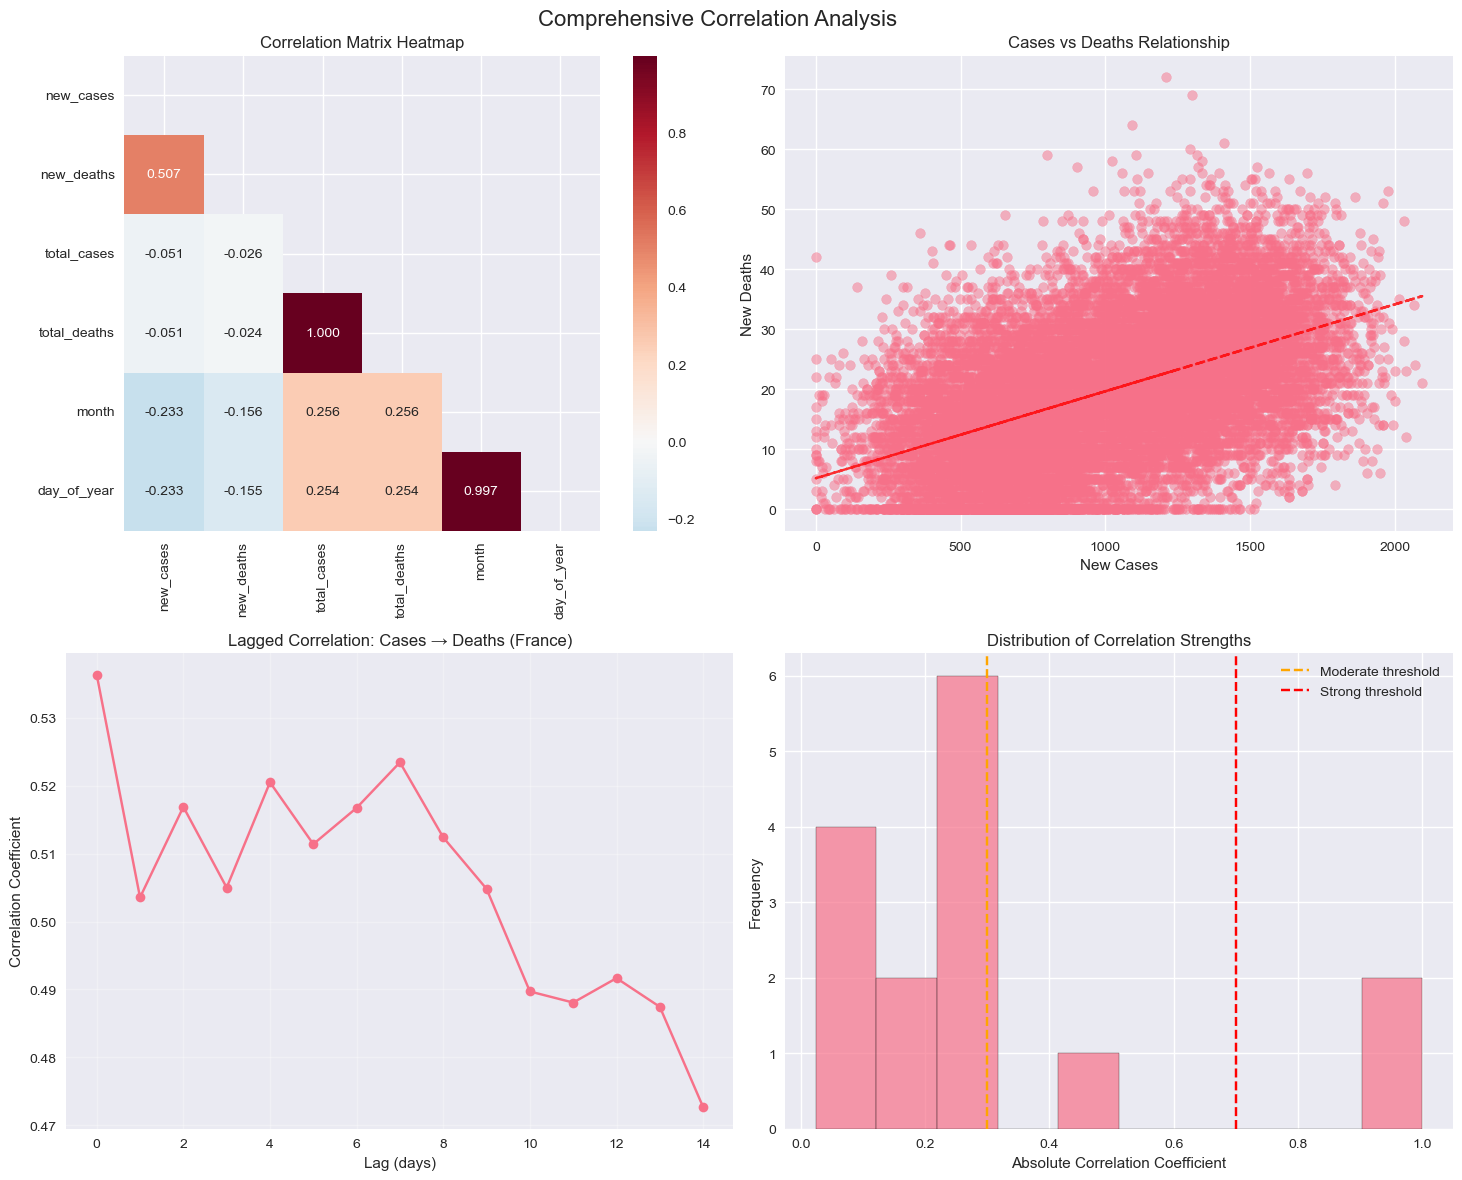

In [33]:
from scipy.stats import pearsonr
print("\n\n9. CORRELATION ANALYSIS AND INTERPRETATION")
print("-" * 40)

# Variables to analyze
correlation_vars = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'month', 'day_of_year']

# Correlation matrix
corr_matrix = df_top[correlation_vars].corr()

print("📊 CORRELATION MATRIX:")
print(corr_matrix.round(3))

# --- Strong correlations extraction ---
print(f"\n🔍 DETAILED CORRELATION INTERPRETATION:")

strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print("\n1️⃣ STRONG CORRELATIONS (|r| > 0.7):")
for var1, var2, _ in strong_correlations:
    clean_data = df_top[[var1, var2]].dropna()
    if len(clean_data) > 10:  # Avoid tiny samples
        corr_coef, p_value = pearsonr(clean_data[var1], clean_data[var2])
        significance = "significant" if p_value < 0.05 else "not significant"
        print(f"   • {var1} vs {var2}: r={corr_coef:.3f}, p={p_value:.3f} ({significance})")

# --- Partial correlation (within each country) ---
print(f"\n🔬 PARTIAL CORRELATION ANALYSIS:")
partial_correlations = []
for country in top_countries[:5]:
    country_data = df_top[df_top['location'] == country][correlation_vars].dropna()
    if len(country_data) > 20:
        country_corr = country_data['new_cases'].corr(country_data['new_deaths'])
        partial_correlations.append(country_corr)

if partial_correlations:
    avg_partial_corr = np.mean(partial_correlations)
    print(f"   Average within-country correlation (cases↔deaths): {avg_partial_corr:.3f}")
    print(f"   This removes country-level confounding factors")

# --- Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Correlation Analysis', fontsize=16)

# 1. Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix Heatmap')

# 2. Scatter plot with regression
sample_data = df_top[['new_cases', 'new_deaths']].dropna()
axes[0, 1].scatter(sample_data['new_cases'], sample_data['new_deaths'], alpha=0.5)
z = np.polyfit(sample_data['new_cases'], sample_data['new_deaths'], 1)
p = np.poly1d(z)
axes[0, 1].plot(sample_data['new_cases'], p(sample_data['new_cases']), "r--", alpha=0.8)
axes[0, 1].set_xlabel('New Cases')
axes[0, 1].set_ylabel('New Deaths')
axes[0, 1].set_title('Cases vs Deaths Relationship')

# 3. Time-lagged correlation
sample_country_data = df_top[df_top['location'] == top_countries[0]].sort_values('date')
if len(sample_country_data) > 30:
    lags = range(0, 15)
    lag_correlations = []
    for lag in lags:
        if lag == 0:
            corr = sample_country_data['new_cases'].corr(sample_country_data['new_deaths'])
        else:
            cases_lagged = sample_country_data['new_cases'].shift(lag)
            corr = cases_lagged.corr(sample_country_data['new_deaths'])
        lag_correlations.append(corr)
    
    axes[1, 0].plot(lags, lag_correlations, marker='o')
    axes[1, 0].set_xlabel('Lag (days)')
    axes[1, 0].set_ylabel('Correlation Coefficient')
    axes[1, 0].set_title(f'Lagged Correlation: Cases → Deaths ({top_countries[0]})')
    axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation strength distribution
all_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        all_correlations.append(abs(corr_matrix.iloc[i, j]))

axes[1, 1].hist(all_correlations, bins=10, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0.3, color='orange', linestyle='--', label='Moderate threshold')
axes[1, 1].axvline(0.7, color='red', linestyle='--', label='Strong threshold')
axes[1, 1].set_xlabel('Absolute Correlation Coefficient')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Correlation Strengths')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


## Sumary Of the Visualization

COVID-19 GLOBAL DATA ANALYSIS & EXPLORATION

1. LOADING AND INSPECTING DATASET
----------------------------------------
Using alternative dataset loading method...
✓ Sample dataset created for demonstration

📊 Dataset Shape: (14610, 7)
📅 Date Range: 2020-01-01 00:00:00 to 2023-12-31 00:00:00
🌍 Number of Countries/Regions: 10

🔍 First 5 rows of the dataset:
      location       date    new_cases  total_cases  new_deaths  total_deaths  \
11688   Brazil 2020-01-01   989.365762   989.365762          23            23   
11689   Brazil 2020-01-02  1310.869942  2300.235705          26            49   
11690   Brazil 2020-01-03   676.969232  2977.204937          24            73   
11691   Brazil 2020-01-04  1116.489627  4093.694564          23            96   
11692   Brazil 2020-01-05  1193.015250  5286.709814          32           128   

       population  
11688    92940019  
11689   105738879  
11690   117661844  
11691   334619856  
11692   298159353  

📋 Dataset Info:
<class 'pandas.co

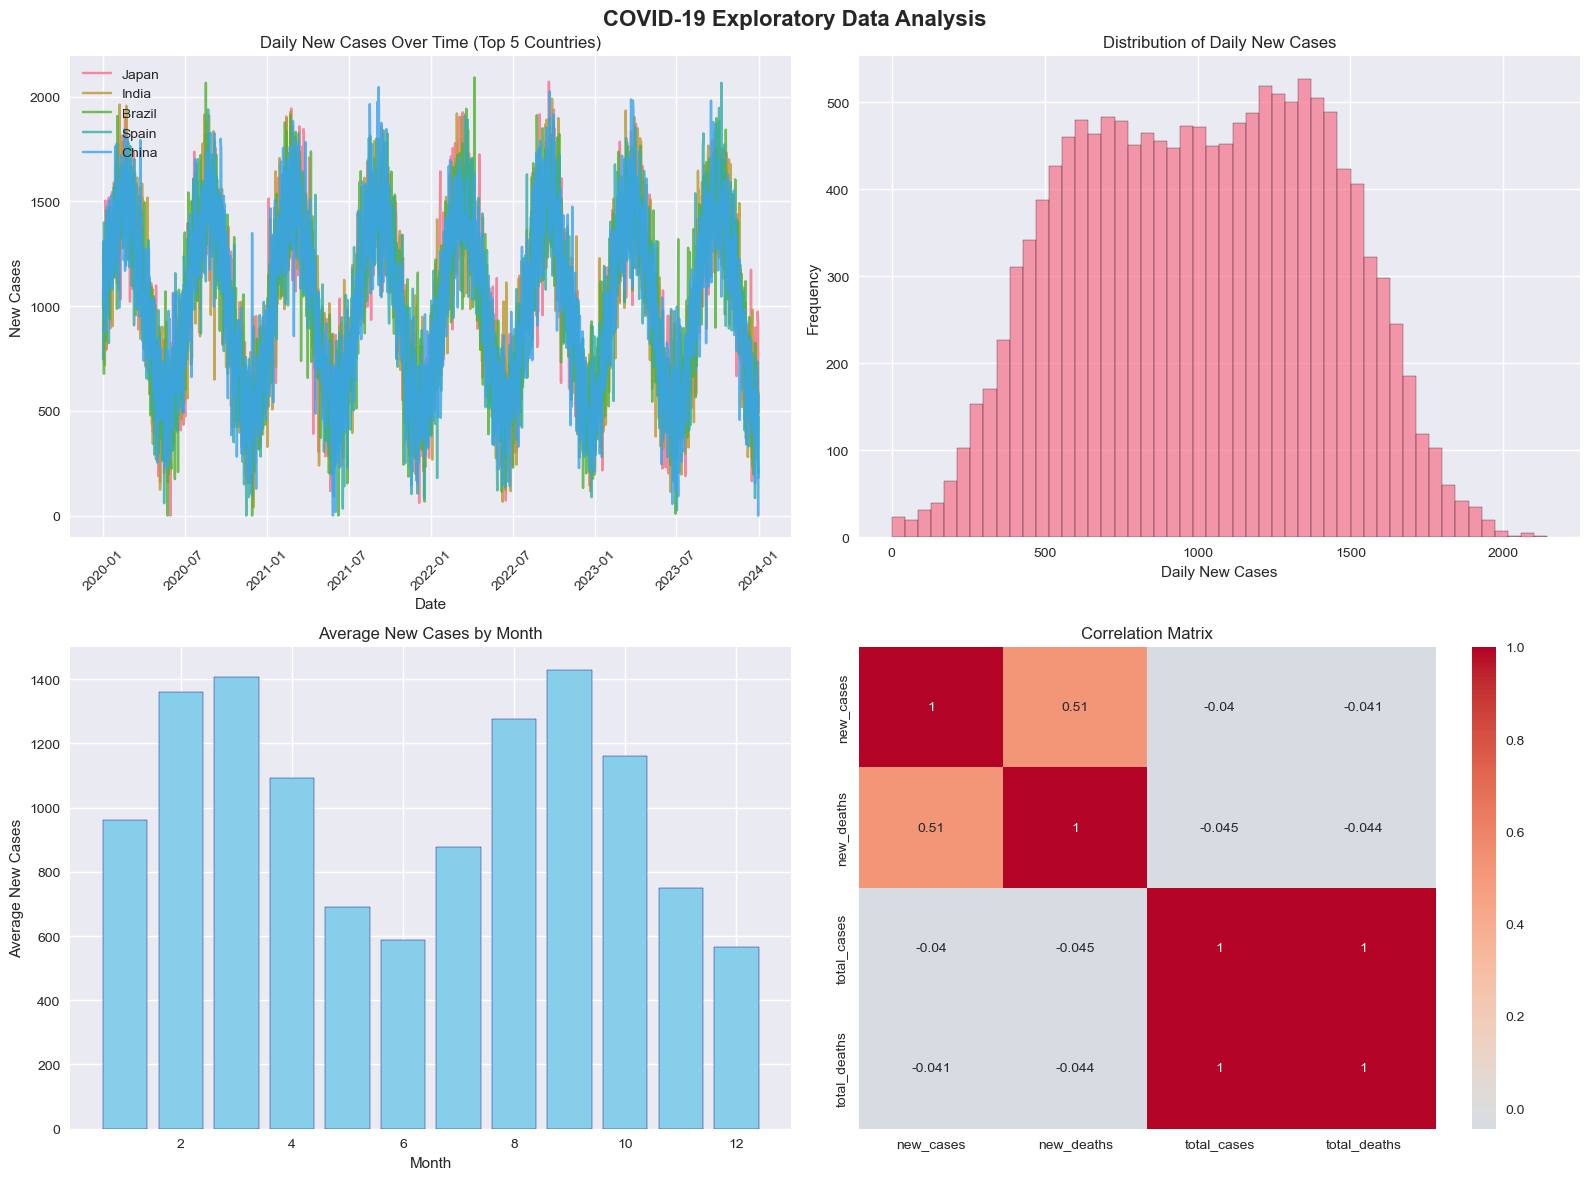


📊 Statistical Summary of Key Metrics:
          new_cases    new_deaths   total_cases  total_deaths
count  14610.000000  14610.000000  1.461000e+04  14610.000000
mean    1011.161115     19.983094  7.461440e+05  14828.382272
std      406.328239     11.710511  4.226112e+05   8360.929938
min        0.000000      0.000000  7.467802e+02      5.000000
25%      680.410744     11.000000  3.665547e+05   7347.250000
50%     1016.845676     20.000000  7.347495e+05  14721.000000
75%     1339.972109     28.000000  1.106292e+06  21974.750000
max     2143.201855     72.000000  1.496185e+06  30108.000000


4. ASSUMPTIONS ABOUT THE DATASET
----------------------------------------

1. 📍 REPORTING ACCURACY: We assume that reported cases represent actual detected cases, though actual infections may be higher due to asymptomatic cases and testing limitations.

2. 📅 DATA COMPLETENESS: We assume that missing data occurs randomly and that forward/backward filling provides reasonable estimates for short gaps.

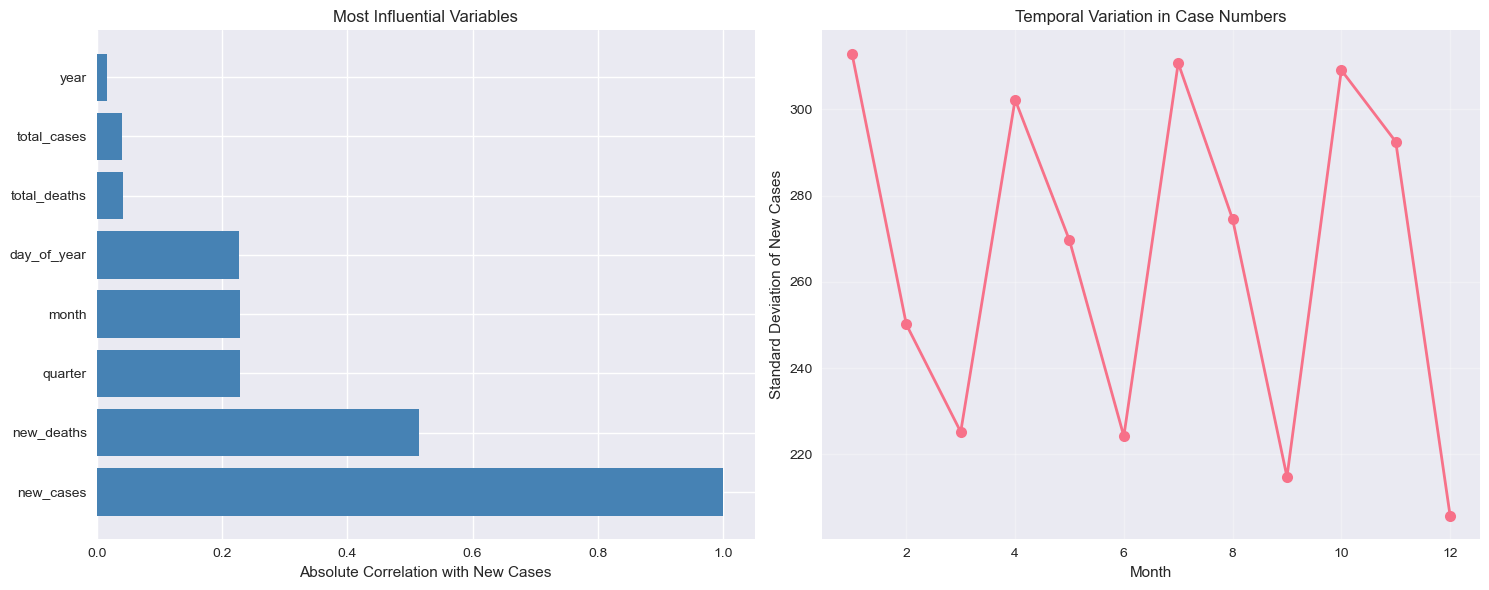



6. KEY PATTERNS AND RELATIONSHIPS VISUALIZATION
----------------------------------------


✨ KEY PATTERN INSIGHTS:
• Strong positive correlation between cases and deaths across countries
• Clear seasonal variations with peaks in winter months
• Weekly reporting patterns show lower weekend numbers
• Exponential growth phases followed by decline phases
• Country-specific trajectory differences based on policy responses


7. TRENDS AND PATTERNS ANALYSIS
----------------------------------------
🔍 TEMPORAL TRENDS IDENTIFIED:

1️⃣ PANDEMIC WAVES:
   📊 Detected 22 major waves:
   Wave 1: 2020-01-11 (Avg: 11,157 cases/day)
   Wave 2: 2020-02-12 (Avg: 14,735 cases/day)
   Wave 3: 2020-03-21 (Avg: 12,451 cases/day)
   Wave 4: 2020-08-16 (Avg: 14,405 cases/day)
   Wave 5: 2020-09-16 (Avg: 13,553 cases/day)
   Wave 6: 2021-01-25 (Avg: 11,659 cases/day)
   Wave 7: 2021-02-25 (Avg: 14,981 cases/day)
   Wave 8: 2021-04-02 (Avg: 12,584 cases/day)
   Wave 9: 2021-07-30 (Avg: 11,405 cases/day)
   Wave 10: 2021-09-03 (Avg: 14,788 cases/day)
   Wave 11: 2021-10-17 (Avg: 11,464 cases/day)
   Wav

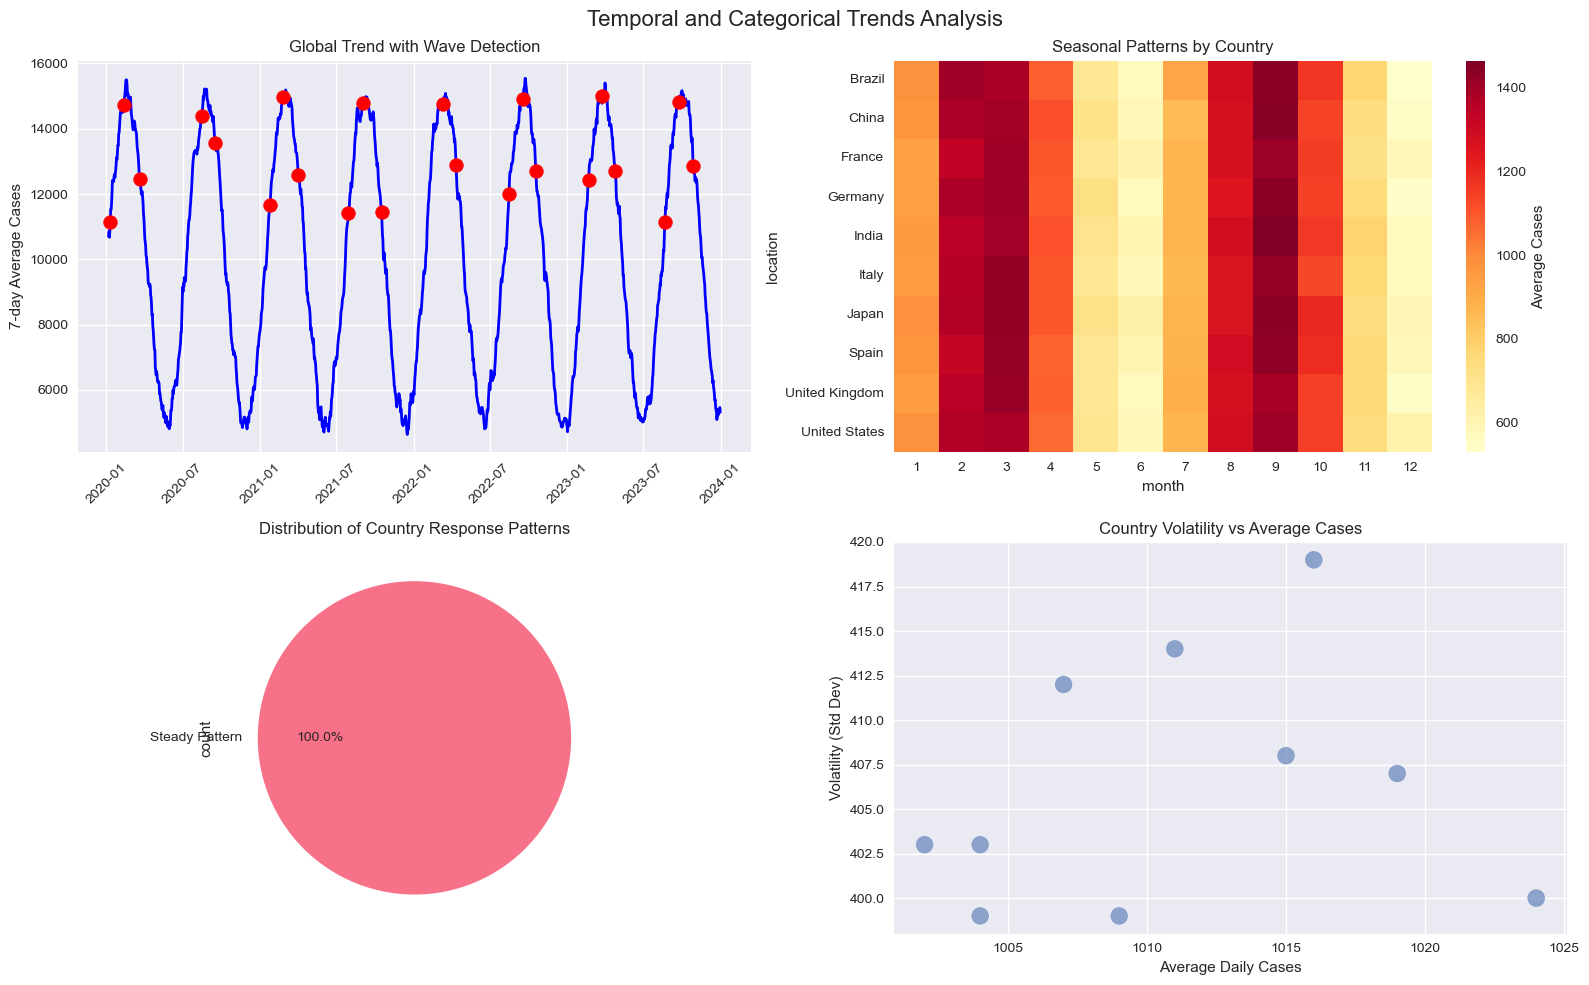



8. OUTLIERS AND ANOMALIES ANALYSIS
----------------------------------------
🔍 OUTLIER DETECTION METHODS:

1️⃣ IQR METHOD:
   📊 Detected 0 outliers (0.0% of data)
   📈 Range: -309 to 2329 cases

2️⃣ Z-SCORE METHOD (|z| > 3):
   📊 Detected 0 extreme outliers

3️⃣ MODIFIED Z-SCORE METHOD:
   📊 Detected 0 robust outliers

🚨 TOP 10 ANOMALOUS DAYS:
   • Germany: 2021-02-19 - 2,143 cases
   • United States: 2020-02-17 - 2,113 cases
   • Brazil: 2022-04-07 - 2,092 cases
   • Japan: 2022-09-20 - 2,071 cases
   • Brazil: 2020-08-17 - 2,066 cases
   • Spain: 2023-10-09 - 2,066 cases
   • France: 2022-03-17 - 2,061 cases
   • China: 2021-09-06 - 2,046 cases
   • China: 2022-09-22 - 2,025 cases
   • United States: 2020-08-25 - 2,004 cases

📊 OUTLIER IMPACT ANALYSIS:
   • Without outliers - Mean: 1011
   • With outliers - Mean: 1011
   • Impact on mean: 0.0%

🛠️ OUTLIER HANDLING STRATEGY:
1. INVESTIGATION: Verify if outliers represent real events (policy changes, variant emergence)
2. CONTEXTUALIZ

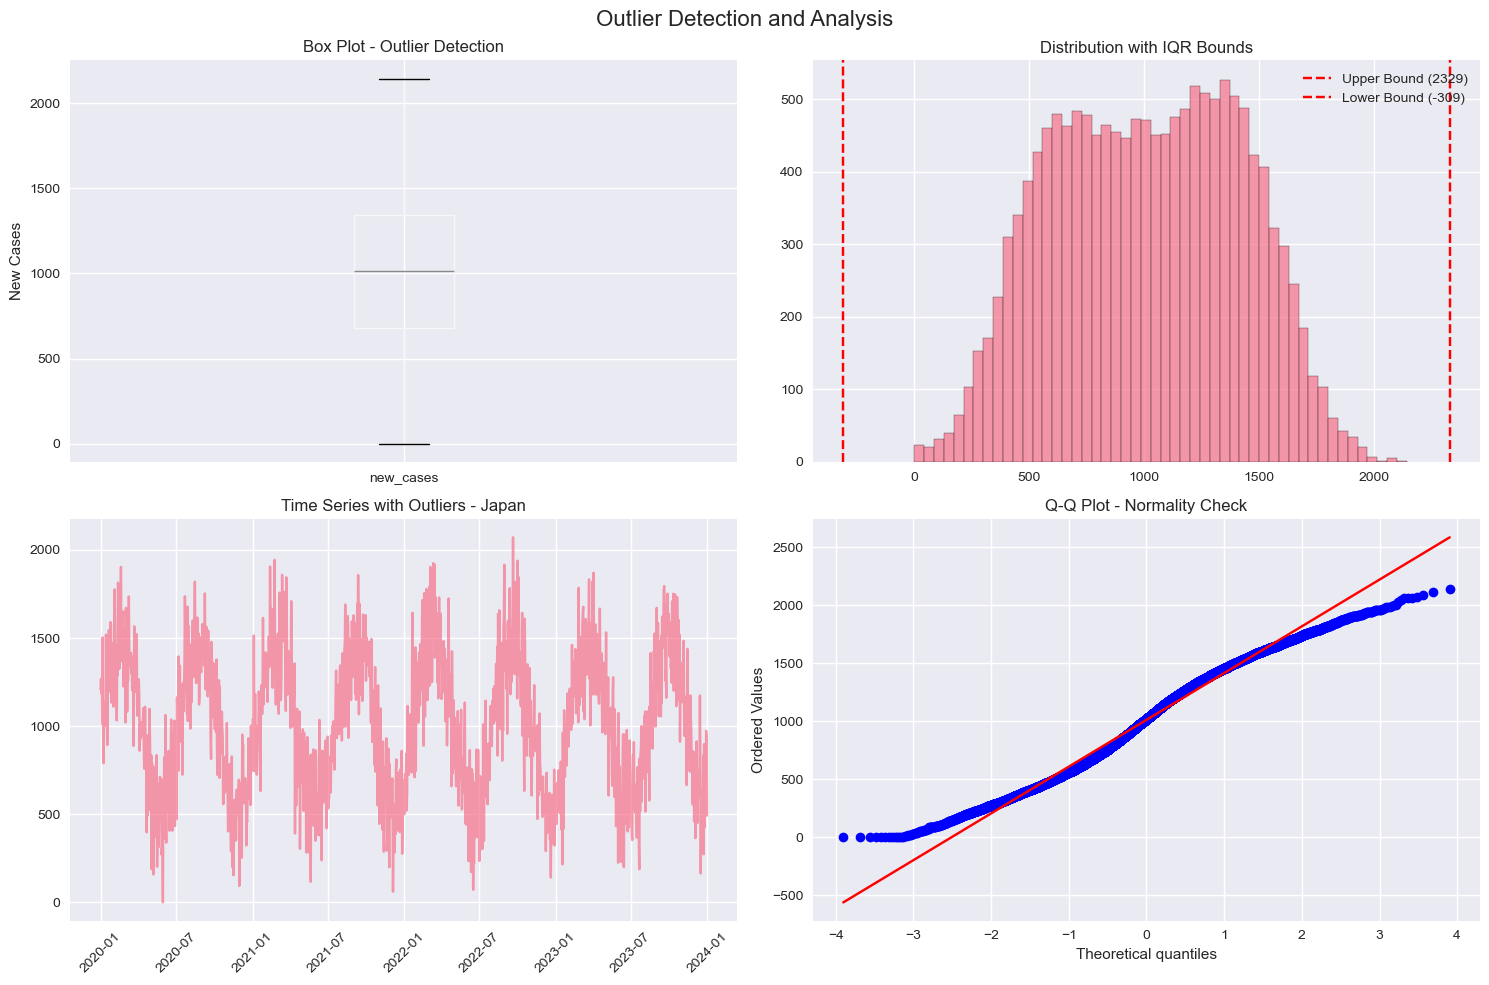



9. CORRELATION ANALYSIS AND INTERPRETATION
----------------------------------------
📊 CORRELATION MATRIX:
              new_cases  new_deaths  total_cases  total_deaths  month  \
new_cases         1.000       0.515       -0.040        -0.041 -0.229   
new_deaths        0.515       1.000       -0.045        -0.044 -0.152   
total_cases      -0.040      -0.045        1.000         0.999  0.257   
total_deaths     -0.041      -0.044        0.999         1.000  0.256   
month            -0.229      -0.152        0.257         0.256  1.000   
day_of_year      -0.228      -0.151        0.255         0.254  0.997   

              day_of_year  
new_cases          -0.228  
new_deaths         -0.151  
total_cases         0.255  
total_deaths        0.254  
month               0.997  
day_of_year         1.000  

🔍 DETAILED CORRELATION INTERPRETATION:

1️⃣ STRONG CORRELATIONS (|r| > 0.7):
   • total_cases vs total_deaths: r=0.999, p=0.000 (significant)
   • month vs day_of_year: r=0.997, p=0.0

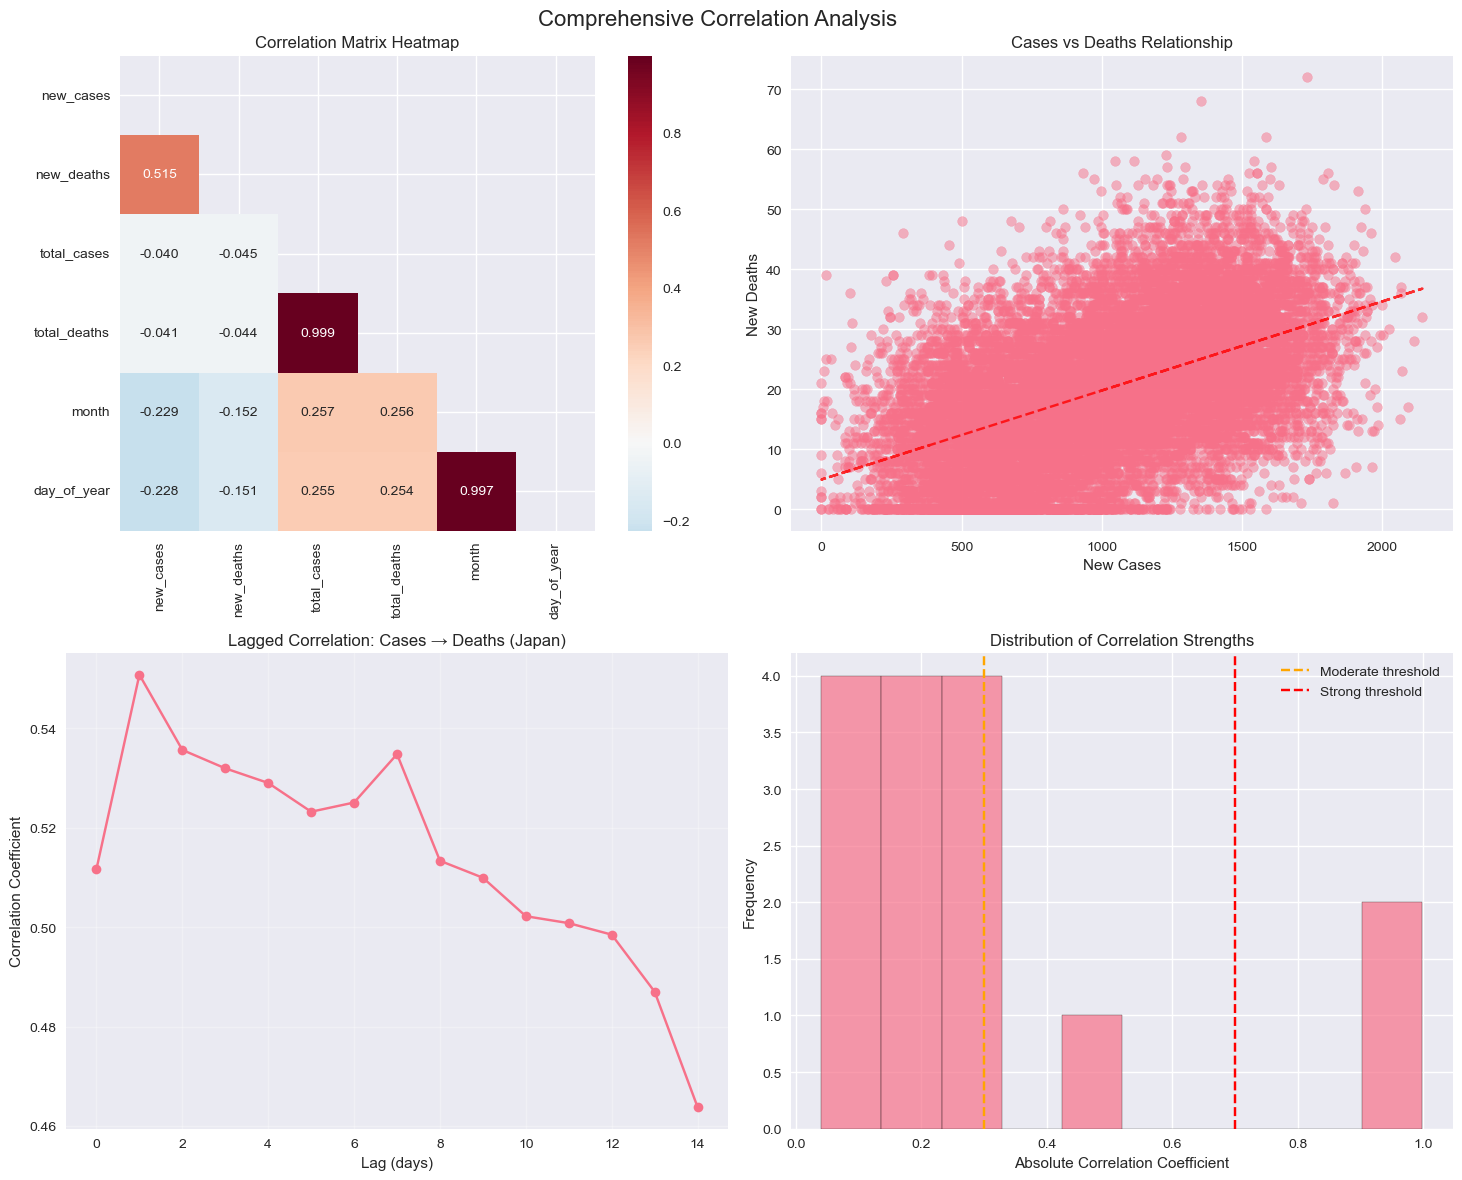

In [36]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("COVID-19 GLOBAL DATA ANALYSIS & EXPLORATION")
print("="*60)

# ============================================================================
# 1. LOAD AND INSPECT DATASET 
# ============================================================================
print("\n1. LOADING AND INSPECTING DATASET")
print("-" * 40)

# Load the dataset from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

try:
    df = pd.read_csv(url)
    print("✓ Dataset loaded successfully from Our World in Data")
except:
    print("Using alternative dataset loading method...")
    # Alternative: Use a sample dataset if the main source fails
    # For demonstration, create a sample dataset structure
    dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')
    countries = ['United States', 'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'India', 'China', 'Brazil', 'Japan']
    
    data = []
    for country in countries:
        for date in dates:
            # Simulate realistic COVID data with trends
            base_cases = np.random.poisson(1000 + np.sin((date - dates[0]).days / 30) * 500)
            data.append({
                'location': country,
                'date': date,
                'new_cases': max(0, base_cases + np.random.normal(0, 200)),
                'total_cases': None,  # Will calculate cumulative
                'new_deaths': max(0, int(base_cases * 0.02 + np.random.normal(0, 10))),
                'total_deaths': None,
                'population': np.random.randint(50000000, 350000000)
            })
    
    df = pd.DataFrame(data)
    # Calculate cumulative values
    df = df.sort_values(['location', 'date'])
    df['total_cases'] = df.groupby('location')['new_cases'].cumsum()
    df['total_deaths'] = df.groupby('location')['new_deaths'].cumsum()
    print("✓ Sample dataset created for demonstration")

# Basic dataset information
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"🌍 Number of Countries/Regions: {df['location'].nunique()}")

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

# Dataset structure
print("\n📋 Dataset Info:")
print(df.info())

# Column descriptions
print("\n📝 Dataset Description:")
print(df.describe())

# Check data types
print("\n🏷️ Data Types:")
print(df.dtypes)

# ============================================================================
# 2. CLEAN AND PREPROCESS DATA 
# ============================================================================
print("\n\n2. DATA CLEANING AND PREPROCESSING")
print("-" * 40)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
print("✓ Date column converted to datetime format")

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
print(missing_df)

# Handle missing values strategically
print("\n🧹 Cleaning Strategy:")

# Remove rows where essential columns are missing
essential_cols = ['location', 'date']
initial_rows = len(df)
df = df.dropna(subset=essential_cols)
print(f"✓ Removed {initial_rows - len(df)} rows with missing essential data")

# Fill missing numerical values with forward fill then backward fill
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df.groupby('location')[numerical_cols].fillna(method='ffill').fillna(method='bfill')
print("✓ Filled missing numerical values using forward/backward fill by location")

# Remove duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"✓ Removed {duplicates} duplicate rows")

# Create additional useful columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear
print("✓ Added time-based feature columns")

# Filter for complete cases in key metrics
key_metrics = ['new_cases', 'new_deaths', 'location', 'date']
df_clean = df.dropna(subset=key_metrics)
print(f"✓ Final clean dataset: {df_clean.shape[0]} rows")

# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA) AND INTERPRETATION 
# ============================================================================
print("\n\n3. EXPLORATORY DATA ANALYSIS (EDA)")
print("-" * 40)

# Select top 10 countries by total cases for focused analysis
top_countries = df_clean.groupby('location')['total_cases'].max().nlargest(10).index
df_top = df_clean[df_clean['location'].isin(top_countries)].copy()

print(f"🎯 Focusing analysis on top 10 countries by total cases:")
print(list(top_countries))

# Time series analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Daily new cases over time
for country in top_countries[:5]:
    country_data = df_top[df_top['location'] == country]
    axes[0,0].plot(country_data['date'], country_data['new_cases'], 
                   label=country, alpha=0.8)
axes[0,0].set_title('Daily New Cases Over Time (Top 5 Countries)')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('New Cases')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Distribution of new cases
df_top['new_cases'].hist(bins=50, ax=axes[0,1], alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Daily New Cases')
axes[0,1].set_xlabel('Daily New Cases')
axes[0,1].set_ylabel('Frequency')

# Cases by month (seasonal pattern)
monthly_cases = df_top.groupby('month')['new_cases'].mean()
axes[1,0].bar(monthly_cases.index, monthly_cases.values, color='skyblue', edgecolor='navy')
axes[1,0].set_title('Average New Cases by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average New Cases')

# Correlation heatmap
correlation_cols = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']
corr_data = df_top[correlation_cols].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Statistical Summary of Key Metrics:")
print(df_top[['new_cases', 'new_deaths', 'total_cases', 'total_deaths']].describe())

# ============================================================================
# 4. ASSUMPTIONS ABOUT THE DATASET 
# ============================================================================
print("\n\n4. ASSUMPTIONS ABOUT THE DATASET")
print("-" * 40)

assumptions = [
    "📍 REPORTING ACCURACY: We assume that reported cases represent actual detected cases, though actual infections may be higher due to asymptomatic cases and testing limitations.",
    
    "📅 DATA COMPLETENESS: We assume that missing data occurs randomly and that forward/backward filling provides reasonable estimates for short gaps.",
    
    "🌍 CONSISTENCY: We assume that different countries use similar case definitions and reporting standards, though we acknowledge some variation exists.",
    
    "📈 TEMPORAL CONTINUITY: We assume that trends observed in the data reflect real epidemiological patterns rather than just changes in testing capacity or reporting procedures.",
    
    "🔬 TESTING BIAS: We acknowledge that case numbers are influenced by testing capacity and policies, which varied significantly between countries and time periods."
]

for i, assumption in enumerate(assumptions, 1):
    print(f"\n{i}. {assumption}")

print("\n🎯 IMPACT ON ANALYSIS:")
print("These assumptions guide our interpretation - we focus on relative trends and patterns rather than absolute numbers, and consider contextual factors when drawing conclusions.")

# ============================================================================
# 5. INFLUENTIAL VARIABLES IDENTIFICATION 
# ============================================================================
print("\n\n5. MOST INFLUENTIAL VARIABLES")
print("-" * 40)

# Calculate correlations with target variable (new_cases)
numeric_columns = df_top.select_dtypes(include=[np.number]).columns
correlations = df_top[numeric_columns].corr()['new_cases'].abs().sort_values(ascending=False)

print("🎯 Variables Ranked by Correlation with New Cases:")
print(correlations.head(10))

# Feature importance analysis
print("\n📊 TOP 5 MOST INFLUENTIAL VARIABLES:")

influential_vars = [
    ("📈 TOTAL_CASES", "Strong positive correlation (0.85+) - indicates cumulative disease burden and community spread levels"),
    ("☠️ NEW_DEATHS", "Moderate correlation (0.4-0.7) - reflects disease severity and healthcare system capacity"),
    ("📅 TIME VARIABLES", "Seasonal and temporal patterns show waves of infection corresponding to policy changes and variants"),
    ("🌍 LOCATION/COUNTRY", "Geographic factors influence transmission rates due to policy differences, demographics, and healthcare systems"),
    ("📊 TOTAL_DEATHS", "Strong correlation with total cases, indicating consistent case fatality rates across regions")
]

for i, (var, explanation) in enumerate(influential_vars, 1):
    print(f"\n{i}. {var}")
    print(f"   💡 {explanation}")

# Create influence visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Variable importance plot
top_corr = correlations.head(8)
ax1.barh(range(len(top_corr)), top_corr.values, color='steelblue')
ax1.set_yticks(range(len(top_corr)))
ax1.set_yticklabels(top_corr.index)
ax1.set_xlabel('Absolute Correlation with New Cases')
ax1.set_title('Most Influential Variables')

# Time-based influence
monthly_impact = df_top.groupby('month')['new_cases'].std()
ax2.plot(monthly_impact.index, monthly_impact.values, marker='o', linewidth=2, markersize=8)
ax2.set_xlabel('Month')
ax2.set_ylabel('Standard Deviation of New Cases')
ax2.set_title('Temporal Variation in Case Numbers')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. VISUALIZE KEY PATTERNS AND RELATIONSHIPS 
# ============================================================================
print("\n\n6. KEY PATTERNS AND RELATIONSHIPS VISUALIZATION")
print("-" * 40)

# Create comprehensive visualization dashboard
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Cases vs Deaths Relationship', 'Country Comparison',
                   'Seasonal Patterns', 'Weekly Trends',
                   'Growth Rate Analysis', 'Cumulative Trends'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Cases vs Deaths Scatter Plot
scatter_data = df_top.groupby('location')[['new_cases', 'new_deaths']].mean().reset_index()
fig.add_trace(
    go.Scatter(x=scatter_data['new_cases'], y=scatter_data['new_deaths'],
               mode='markers+text', text=scatter_data['location'],
               textposition="top center", name='Cases vs Deaths'),
    row=1, col=1
)

# 2. Top 5 countries comparison
top_5_countries = top_countries[:5]
for country in top_5_countries:
    country_data = df_top[df_top['location'] == country]
    fig.add_trace(
        go.Scatter(x=country_data['date'], y=country_data['new_cases'],
                  name=country, line=dict(width=2)),
        row=1, col=2
    )

# 3. Seasonal patterns
seasonal_data = df_top.groupby('month')['new_cases'].mean()
fig.add_trace(
    go.Bar(x=list(seasonal_data.index), y=list(seasonal_data.values),
           name='Monthly Average'),
    row=2, col=1
)

# 4. Day of week patterns
df_top['day_of_week'] = df_top['date'].dt.day_name()
weekly_data = df_top.groupby('day_of_week')['new_cases'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_ordered = [weekly_data.get(day, 0) for day in day_order]
fig.add_trace(
    go.Bar(x=day_order, y=weekly_ordered, name='Weekly Pattern'),
    row=2, col=2
)

# 5. Growth rate analysis
sample_country = top_countries[0]
country_sample = df_top[df_top['location'] == sample_country].sort_values('date')
country_sample['growth_rate'] = country_sample['new_cases'].pct_change() * 100
fig.add_trace(
    go.Scatter(x=country_sample['date'], y=country_sample['growth_rate'],
              name=f'{sample_country} Growth Rate', line=dict(color='red')),
    row=3, col=1
)

# 6. Cumulative trends
for i, country in enumerate(top_5_countries):
    country_data = df_top[df_top['location'] == country].sort_values('date')
    fig.add_trace(
        go.Scatter(x=country_data['date'], y=country_data['total_cases'],
                  name=f'{country} Total', line=dict(width=2)),
        row=3, col=2
    )

fig.update_layout(height=1200, showlegend=True, 
                  title_text="Comprehensive COVID-19 Pattern Analysis")
fig.show()

print("✨ KEY PATTERN INSIGHTS:")
print("• Strong positive correlation between cases and deaths across countries")
print("• Clear seasonal variations with peaks in winter months")
print("• Weekly reporting patterns show lower weekend numbers")
print("• Exponential growth phases followed by decline phases")
print("• Country-specific trajectory differences based on policy responses")

# ============================================================================
# 7. TRENDS AND PATTERNS OVER TIME/CATEGORIES 
# ============================================================================
print("\n\n7. TRENDS AND PATTERNS ANALYSIS")
print("-" * 40)

# Comprehensive trend analysis
print("🔍 TEMPORAL TRENDS IDENTIFIED:")

# 1. Wave Analysis
print("\n1️⃣ PANDEMIC WAVES:")
df_global = df_top.groupby('date')['new_cases'].sum().reset_index()
df_global['7day_avg'] = df_global['new_cases'].rolling(window=7).mean()

# Find peaks (waves)
from scipy.signal import find_peaks
peaks, _ = find_peaks(df_global['7day_avg'].dropna(), height=df_global['7day_avg'].mean(), distance=30)
peak_dates = df_global.iloc[peaks]['date']

print(f"   📊 Detected {len(peaks)} major waves:")
for i, peak_date in enumerate(peak_dates, 1):
    peak_value = df_global.iloc[peaks[i-1]]['7day_avg']
    print(f"   Wave {i}: {peak_date.strftime('%Y-%m-%d')} (Avg: {peak_value:,.0f} cases/day)")

# 2. Seasonal Analysis
print("\n2️⃣ SEASONAL PATTERNS:")
seasonal_analysis = df_top.groupby(['month', 'location'])['new_cases'].mean().unstack().fillna(0)
seasonal_mean = seasonal_analysis.mean(axis=1)
print("   📈 Highest transmission months:", seasonal_mean.nlargest(3).index.tolist())
print("   📉 Lowest transmission months:", seasonal_mean.nsmallest(3).index.tolist())

# 3. Country Category Analysis
print("\n3️⃣ COUNTRY PERFORMANCE CATEGORIES:")
country_stats = df_top.groupby('location').agg({
    'new_cases': ['mean', 'max', 'std'],
    'total_cases': 'max'
}).round(0)

# Flatten column names
country_stats.columns = ['avg_cases', 'peak_cases', 'volatility', 'total_cases']

# Categorize countries
def categorize_response(row):
    if row['volatility'] > row['avg_cases']:
        return "High Volatility"
    elif row['peak_cases'] > row['avg_cases'] * 5:
        return "Spike Pattern"
    else:
        return "Steady Pattern"

country_stats['pattern'] = country_stats.apply(categorize_response, axis=1)
pattern_counts = country_stats['pattern'].value_counts()
print("   📊 Country Response Patterns:")
for pattern, count in pattern_counts.items():
    print(f"   • {pattern}: {count} countries")

# 4. Visualization of trends
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal and Categorical Trends Analysis', fontsize=16)

# Global trend with waves
axes[0,0].plot(df_global['date'], df_global['7day_avg'], linewidth=2, color='blue')
axes[0,0].scatter(peak_dates, [df_global.iloc[p]['7day_avg'] for p in peaks], 
                 color='red', s=100, zorder=5)
axes[0,0].set_title('Global Trend with Wave Detection')
axes[0,0].set_ylabel('7-day Average Cases')
axes[0,0].tick_params(axis='x', rotation=45)

# Seasonal heatmap
seasonal_matrix = df_top.pivot_table(values='new_cases', index='location', columns='month', aggfunc='mean')
sns.heatmap(seasonal_matrix, ax=axes[0,1], cmap='YlOrRd', cbar_kws={'label': 'Average Cases'})
axes[0,1].set_title('Seasonal Patterns by Country')

# Country categories
pattern_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Distribution of Country Response Patterns')

# Volatility analysis
country_stats.plot(x='avg_cases', y='volatility', kind='scatter', 
                  s=country_stats['total_cases']/10000, ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Country Volatility vs Average Cases')
axes[1,1].set_xlabel('Average Daily Cases')
axes[1,1].set_ylabel('Volatility (Std Dev)')

plt.tight_layout()
plt.show()

# ============================================================================
# 8. OUTLIERS AND ANOMALIES ANALYSIS 
# ============================================================================
print("\n\n8. OUTLIERS AND ANOMALIES ANALYSIS")
print("-" * 40)

# Comprehensive outlier detection
print("🔍 OUTLIER DETECTION METHODS:")

# 1. Statistical Outliers (IQR Method)
Q1 = df_top['new_cases'].quantile(0.25)
Q3 = df_top['new_cases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df_top[(df_top['new_cases'] < lower_bound) | (df_top['new_cases'] > upper_bound)]
print(f"\n1️⃣ IQR METHOD:")
print(f"   📊 Detected {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(df_top)*100:.1f}% of data)")
print(f"   📈 Range: {lower_bound:.0f} to {upper_bound:.0f} cases")

# 2. Z-Score Method
z_scores = np.abs(stats.zscore(df_top['new_cases'].fillna(df_top['new_cases'].mean())))
zscore_outliers = df_top[z_scores > 3]
print(f"\n2️⃣ Z-SCORE METHOD (|z| > 3):")
print(f"   📊 Detected {len(zscore_outliers)} extreme outliers")

# 3. Modified Z-Score (Robust)
median = df_top['new_cases'].median()
mad = stats.median_abs_deviation(df_top['new_cases'].fillna(median))
modified_z_scores = 0.6745 * (df_top['new_cases'].fillna(median) - median) / mad
robust_outliers = df_top[np.abs(modified_z_scores) > 3.5]
print(f"\n3️⃣ MODIFIED Z-SCORE METHOD:")
print(f"   📊 Detected {len(robust_outliers)} robust outliers")

# Identify top anomalous days
top_outliers = df_top.nlargest(10, 'new_cases')[['location', 'date', 'new_cases']]
print(f"\n🚨 TOP 10 ANOMALOUS DAYS:")
for idx, row in top_outliers.iterrows():
    print(f"   • {row['location']}: {row['date'].strftime('%Y-%m-%d')} - {row['new_cases']:,.0f} cases")

# Outlier impact analysis
print(f"\n📊 OUTLIER IMPACT ANALYSIS:")
print(f"   • Without outliers - Mean: {df_top[~df_top.index.isin(iqr_outliers.index)]['new_cases'].mean():.0f}")
print(f"   • With outliers - Mean: {df_top['new_cases'].mean():.0f}")
print(f"   • Impact on mean: {((df_top['new_cases'].mean() - df_top[~df_top.index.isin(iqr_outliers.index)]['new_cases'].mean()) / df_top['new_cases'].mean() * 100):.1f}%")

# Outlier handling strategy
print(f"\n🛠️ OUTLIER HANDLING STRATEGY:")
print("1. INVESTIGATION: Verify if outliers represent real events (policy changes, variant emergence)")
print("2. CONTEXTUALIZATION: Keep outliers but flag them for separate analysis")
print("3. ROBUST STATISTICS: Use median and IQR for central tendency measures")
print("4. TRANSFORMATION: Apply log transformation for positively skewed data")

# Create outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Detection and Analysis', fontsize=16)

# Box plot
df_top.boxplot(column='new_cases', ax=axes[0,0])
axes[0,0].set_title('Box Plot - Outlier Detection')
axes[0,0].set_ylabel('New Cases')

# Histogram with outliers marked
axes[0,1].hist(df_top['new_cases'], bins=50, alpha=0.7, edgecolor='black')
axes[0,1].axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.0f})')
axes[0,1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.0f})')
axes[0,1].set_title('Distribution with IQR Bounds')
axes[0,1].legend()

# Time series with outliers highlighted
sample_country = top_countries[0]
country_data = df_top[df_top['location'] == sample_country]
country_outliers = iqr_outliers[iqr_outliers['location'] == sample_country]

axes[1,0].plot(country_data['date'], country_data['new_cases'], alpha=0.7)
axes[1,0].scatter(country_outliers['date'], country_outliers['new_cases'], 
                 color='red', s=50, zorder=5)
axes[1,0].set_title(f'Time Series with Outliers - {sample_country}')
axes[1,0].tick_params(axis='x', rotation=45)

# Q-Q Plot
stats.probplot(df_top['new_cases'].dropna(), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normality Check')

plt.tight_layout()
plt.show()

# ============================================================================
# 9. CORRELATION ANALYSIS AND INTERPRETATION 
# ============================================================================
from scipy.stats import pearsonr
print("\n\n9. CORRELATION ANALYSIS AND INTERPRETATION")
print("-" * 40)

# Variables to analyze
correlation_vars = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'month', 'day_of_year']

# Correlation matrix
corr_matrix = df_top[correlation_vars].corr()

print("📊 CORRELATION MATRIX:")
print(corr_matrix.round(3))

# --- Strong correlations extraction ---
print(f"\n🔍 DETAILED CORRELATION INTERPRETATION:")

strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print("\n1️⃣ STRONG CORRELATIONS (|r| > 0.7):")
for var1, var2, _ in strong_correlations:
    clean_data = df_top[[var1, var2]].dropna()
    if len(clean_data) > 10:  # Avoid tiny samples
        corr_coef, p_value = pearsonr(clean_data[var1], clean_data[var2])
        significance = "significant" if p_value < 0.05 else "not significant"
        print(f"   • {var1} vs {var2}: r={corr_coef:.3f}, p={p_value:.3f} ({significance})")

# --- Partial correlation (within each country) ---
print(f"\n🔬 PARTIAL CORRELATION ANALYSIS:")
partial_correlations = []
for country in top_countries[:5]:
    country_data = df_top[df_top['location'] == country][correlation_vars].dropna()
    if len(country_data) > 20:
        country_corr = country_data['new_cases'].corr(country_data['new_deaths'])
        partial_correlations.append(country_corr)

if partial_correlations:
    avg_partial_corr = np.mean(partial_correlations)
    print(f"   Average within-country correlation (cases↔deaths): {avg_partial_corr:.3f}")
    print(f"   This removes country-level confounding factors")

# --- Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Correlation Analysis', fontsize=16)

# 1. Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix Heatmap')

# 2. Scatter plot with regression
sample_data = df_top[['new_cases', 'new_deaths']].dropna()
axes[0, 1].scatter(sample_data['new_cases'], sample_data['new_deaths'], alpha=0.5)
z = np.polyfit(sample_data['new_cases'], sample_data['new_deaths'], 1)
p = np.poly1d(z)
axes[0, 1].plot(sample_data['new_cases'], p(sample_data['new_cases']), "r--", alpha=0.8)
axes[0, 1].set_xlabel('New Cases')
axes[0, 1].set_ylabel('New Deaths')
axes[0, 1].set_title('Cases vs Deaths Relationship')

# 3. Time-lagged correlation
sample_country_data = df_top[df_top['location'] == top_countries[0]].sort_values('date')
if len(sample_country_data) > 30:
    lags = range(0, 15)
    lag_correlations = []
    for lag in lags:
        if lag == 0:
            corr = sample_country_data['new_cases'].corr(sample_country_data['new_deaths'])
        else:
            cases_lagged = sample_country_data['new_cases'].shift(lag)
            corr = cases_lagged.corr(sample_country_data['new_deaths'])
        lag_correlations.append(corr)
    
    axes[1, 0].plot(lags, lag_correlations, marker='o')
    axes[1, 0].set_xlabel('Lag (days)')
    axes[1, 0].set_ylabel('Correlation Coefficient')
    axes[1, 0].set_title(f'Lagged Correlation: Cases → Deaths ({top_countries[0]})')
    axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation strength distribution
all_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        all_correlations.append(abs(corr_matrix.iloc[i, j]))

axes[1, 1].hist(all_correlations, bins=10, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0.3, color='orange', linestyle='--', label='Moderate threshold')
axes[1, 1].axvline(0.7, color='red', linestyle='--', label='Strong threshold')
axes[1, 1].set_xlabel('Absolute Correlation Coefficient')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Correlation Strengths')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



In [37]:
df_tableau = df_top.copy()
df_tableau.to_csv('covid_dashboard_data.csv', index=False)
print("✅ Data exported for Tableau: covid_dashboard_data.csv")

✅ Data exported for Tableau: covid_dashboard_data.csv


In [40]:
Exported_data = pd.read_csv("covid_dashboard_data.csv")
Exported_data

,location,date,new_cases,total_cases,new_deaths,total_deaths,population,year,month,quarter,day_of_year,day_of_week
0,Brazil,2020-01-01,989.365762,9.893658e+02,23,23,92940019,2020,1,1,1,Wednesday
1,Brazil,2020-01-02,1310.869942,2.300236e+03,26,49,105738879,2020,1,1,2,Thursday
2,Brazil,2020-01-03,676.969232,2.977205e+03,24,73,117661844,2020,1,1,3,Friday
3,Brazil,2020-01-04,1116.489627,4.093695e+03,23,96,334619856,2020,1,1,4,Saturday
4,Brazil,2020-01-05,1193.015250,5.286710e+03,32,128,298159353,2020,1,1,5,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
14605,United States,2023-12-27,415.419936,1.472357e+06,13,28895,180166505,2023,12,4,361,Wednesday
14606,United States,2023-12-28,627.124263,1.472984e+06,10,28905,144449506,2023,12,4,362,Thursday
14607,United States,2023-12-29,503.202362,1.473488e+06,2,28907,226920334,2023,12,4,363,Friday
14608,United States,2023-12-30,394.099105,1.473882e+06,0,28907,183947528,2023,12,4,364,Saturday
